# MACHINE LEARNING PROJECT

## Import Libraries

In [125]:
# Libraries to help with reading and manipulating data
import numpy as np
import pandas as pd

import warnings 
warnings.filterwarnings( "ignore")
# Libraries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import pyplot
from pylab import rcParams

# Command to tell Python to actually display the graphs
%matplotlib inline

# this library contains a large number of probability distributions as well as a growing library of statistical functions
import scipy.stats as stats  

# sklearn library for predicitive modelling
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.preprocessing import scale
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from scipy.stats import zscore
from sklearn.model_selection import cross_val_score
from sklearn.metrics import roc_auc_score,roc_curve,classification_report,confusion_matrix,plot_confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier

# To build linear regression_model
import statsmodels.api as sm

# set working directory
import os
os.getcwd()
os.chdir('C:\\Users\\Dubey\\Downloads')

import warnings
warnings.filterwarnings("ignore")

In [126]:
# this two lines of code is just to increase the size of the display
from IPython.core.display import display, HTML 
display(HTML('<style>.container { width:90% !important; }<\style>'))

# set column number to see all columns
pd.set_option('display.max_columns', 20)

## PROBLEM 1

You are hired by one of the leading news channels CNBE who wants to analyze recent elections. This survey was conducted on 1525 voters with 9 variables. 
You have to build a model, to predict which party a voter will vote for on the basis of the given information, to create an exit poll that will help in predicting overall win and seats covered by a particular party.

**Data Dictionary**	
	
1. vote: Party choice: Conservative or Labour	
	
2. age: in years	
	
3. economic.cond.national: Assessment of current national economic conditions, 1 to 5.	
	
4. economic.cond.household: Assessment of current household economic conditions, 1 to 5.	
	
5. Blair: Assessment of the Labour leader, 1 to 5.	
	
6. Hague: Assessment of the Conservative leader, 1 to 5.	
	
7. Europe: an 11-point scale that measures respondents' attitudes toward European integration. High scores represent ‘Eurosceptic’ sentiment.	
	
8. political.knowledge: Knowledge of parties' positions on European integration, 0 to 3.	
	
9. gender: female or male.	

## 1.1) Read the dataset. Describe the data briefly. Interpret the inferences for each. Initial steps like head() .info(), Data Types, etc . Null value check, Summary stats, Skewness must be discussed.

In [3]:
# READ DATASET
df = pd.read_excel('Election_Data (11).xlsx')

In [4]:
# TOP ROWs OF DATASET
df.head()

,Unnamed: 0,vote,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge,gender
0,1,Labour,43,3,3,4,1,2,2,female
1,2,Labour,36,4,4,4,4,5,2,male
2,3,Labour,35,4,4,5,2,3,2,male
3,4,Labour,24,4,2,2,1,4,0,female
4,5,Labour,41,2,2,1,1,6,2,male


In [5]:
# LAST FEW ROWS OF DATASET
df.tail()

,Unnamed: 0,vote,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge,gender
1520,1521,Conservative,67,5,3,2,4,11,3,male
1521,1522,Conservative,73,2,2,4,4,8,2,male
1522,1523,Labour,37,3,3,5,4,2,2,male
1523,1524,Conservative,61,3,3,1,4,11,2,male
1524,1525,Conservative,74,2,3,2,4,11,0,female


In [6]:
# SHAPE OF DATASET
df.shape

(1525, 10)

In [7]:
# STATISTICAL DESCRIPTION
df.describe()

,Unnamed: 0,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge
count,1525.000000,1525.000000,1525.000000,1525.000000,1525.000000,1525.000000,1525.000000,1525.000000
mean,763.000000,54.182295,3.245902,3.140328,3.334426,2.746885,6.728525,1.542295
std,440.373894,15.711209,0.880969,0.929951,1.174824,1.230703,3.297538,1.083315
min,1.000000,24.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
25%,382.000000,41.000000,3.000000,3.000000,2.000000,2.000000,4.000000,0.000000
50%,763.000000,53.000000,3.000000,3.000000,4.000000,2.000000,6.000000,2.000000
75%,1144.000000,67.000000,4.000000,4.000000,4.000000,4.000000,10.000000,2.000000
max,1525.000000,93.000000,5.000000,5.000000,5.000000,5.000000,11.000000,3.000000


In [8]:
# SKEWNESS
d=pd.DataFrame(df.skew())
d

,0
Unnamed: 0,0.000000
age,0.144621
economic.cond.national,-0.240453
economic.cond.household,-0.149552
Blair,-0.535419
Hague,0.152100
Europe,-0.135947
political.knowledge,-0.426838


In [9]:
# DATATYPE OF DATASET
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1525 entries, 0 to 1524
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Unnamed: 0               1525 non-null   int64 
 1   vote                     1525 non-null   object
 2   age                      1525 non-null   int64 
 3   economic.cond.national   1525 non-null   int64 
 4   economic.cond.household  1525 non-null   int64 
 5   Blair                    1525 non-null   int64 
 6   Hague                    1525 non-null   int64 
 7   Europe                   1525 non-null   int64 
 8   political.knowledge      1525 non-null   int64 
 9   gender                   1525 non-null   object
dtypes: int64(8), object(2)
memory usage: 119.3+ KB


In [10]:
# NULLS IN THE DATASET
pd.DataFrame(df.isnull().sum())

,0
Unnamed: 0,0
vote,0
age,0
economic.cond.national,0
economic.cond.household,0
Blair,0
Hague,0
Europe,0
political.knowledge,0
gender,0


In [11]:
# DUPLICATE IN DATASET
df.duplicated().sum()

0

In [12]:
col=df.columns
col

Index(['Unnamed: 0', 'vote', 'age', 'economic.cond.national',
       'economic.cond.household', 'Blair', 'Hague', 'Europe',
       'political.knowledge', 'gender'],
      dtype='object')

In [13]:
print(1,col[2],' ',df[df.age==0].shape[0],'\n','% porportion of 0s : ',df[df.age==0].shape[0]/df.shape[0]*100,2,'%')
print(2,col[5],' ',df[df.Blair==0].shape[0],'\n','% porportion of 0s : ',df[df.Blair==0].shape[0]/df.shape[0]*100,2,'%')
print(3,col[6],' ',df[df.Hague==0].shape[0],'\n','% porportion of 0s : ',df[df.Hague==0].shape[0]/df.shape[0]*100,2,'%')
print(4,col[7],' ',df[df.Europe==0].shape[0],'\n','% porportion of 0s : ',df[df.Europe==0].shape[0]/df.shape[0]*100,2,'%')
print(5,col[1],' ',df[df.vote==0].shape[0],'\n','% porportion of 0s : ',df[df.vote==0].shape[0]/df.shape[0]*100,2,'%')
print(6,col[9],' ',df[df.gender==0].shape[0],'\n','% porportion of 0s : ',df[df.gender==0].shape[0]/df.shape[0]*100,2,'%')

1 age   0 
 % porportion of 0s :  0.0 2 %
2 Blair   0 
 % porportion of 0s :  0.0 2 %
3 Hague   0 
 % porportion of 0s :  0.0 2 %
4 Europe   0 
 % porportion of 0s :  0.0 2 %
5 vote   0 
 % porportion of 0s :  0.0 2 %
6 gender   0 
 % porportion of 0s :  0.0 2 %


## 1.2) Perform EDA (Check the null values, Data types, shape, Univariate, bivariate analysis). Also check for outliers (4 pts). Interpret the inferences for each (3 pts) Distribution plots(histogram) or similar plots for the continuous columns. Box plots, Correlation plots. Appropriate plots for categorical variables. Inferences on each plot. Outliers proportion should be discussed, and inferences from above used plots should be there. There is no restriction on how the learner wishes to implement this but the code should be able to represent the correct output and inferences should be logical and correct.

In [14]:
# Drop column 'Unnamed' as its only a serial number column
df = df.drop(['Unnamed: 0'],axis=1)

### Bivariate Analysis :

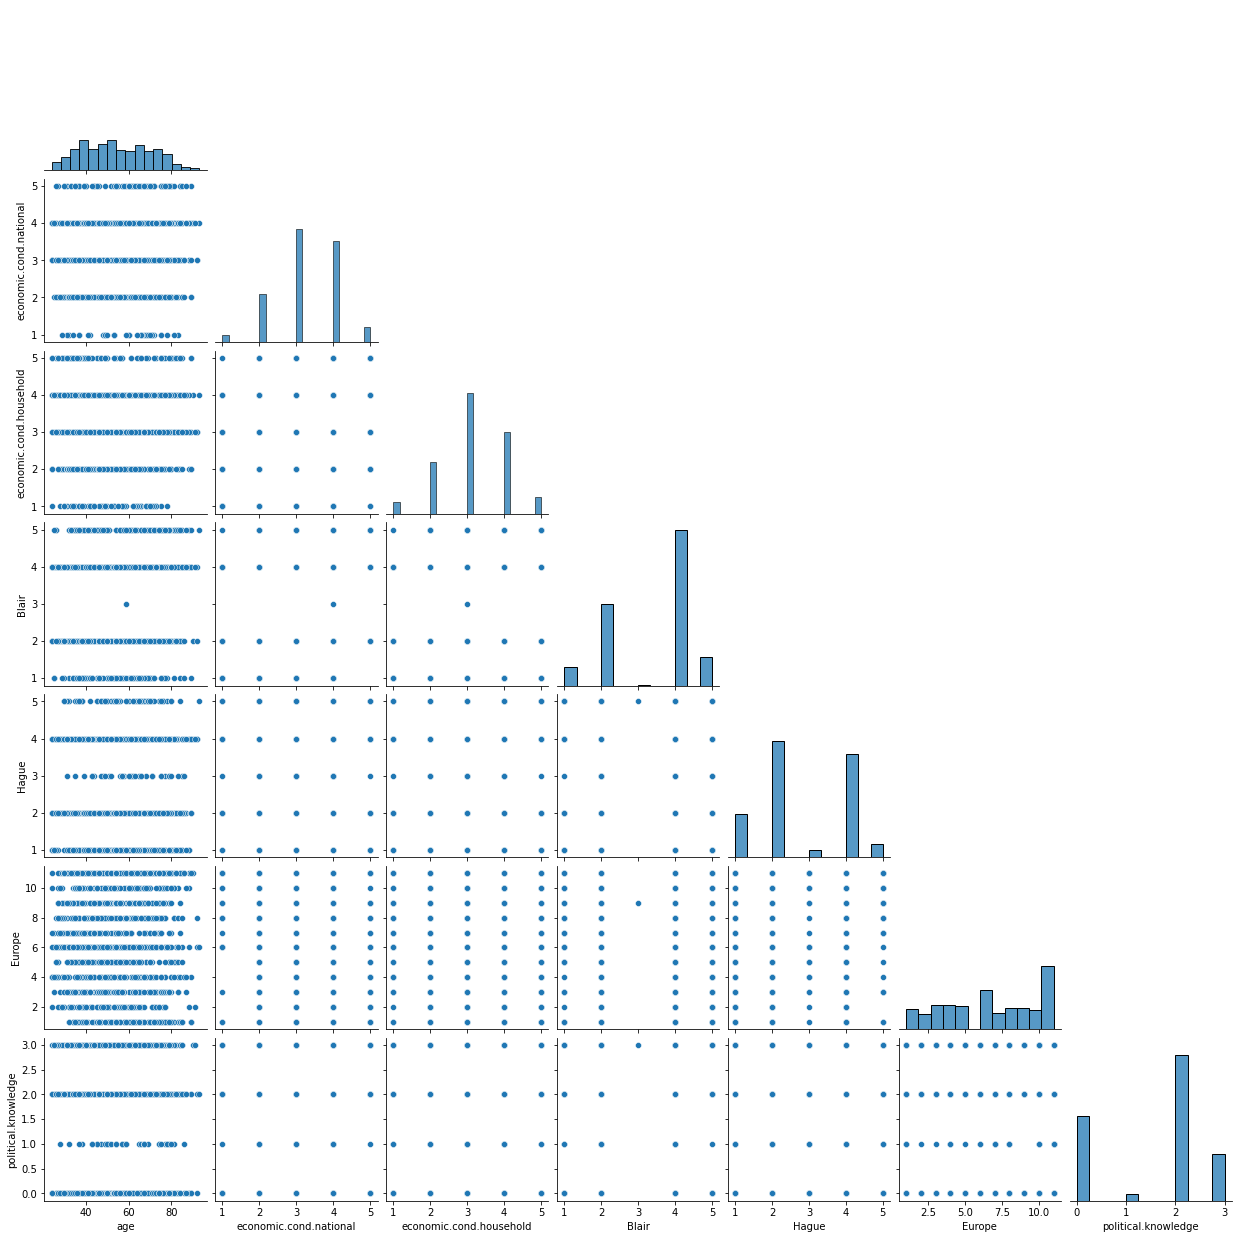

In [15]:
# Pair plot
sns.pairplot(df, corner=True);

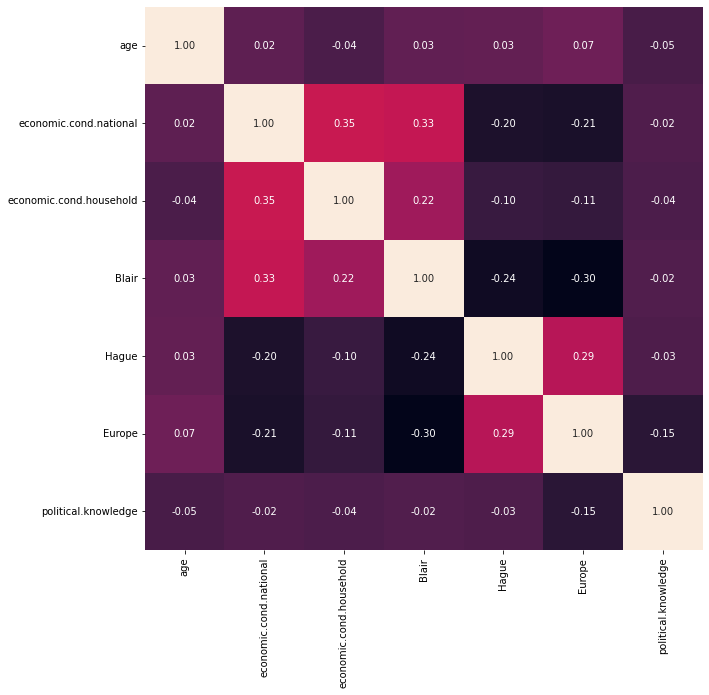

In [16]:
# Correlation plot
fig=plt.subplots(figsize=(10,10))
sns.heatmap(df.corr(),annot=True,fmt='.2f',cbar=False)
plt.show()

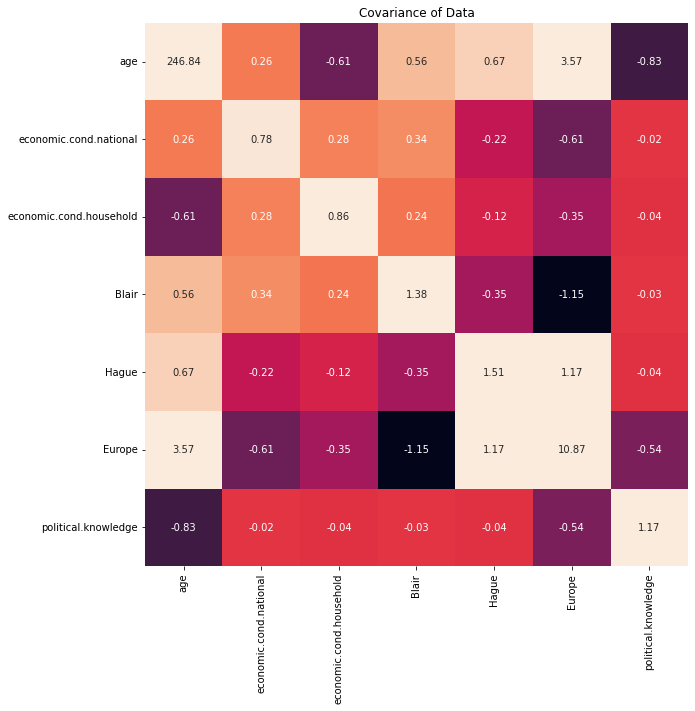

In [17]:
# covariance plot
fig=plt.subplots(figsize=(10,10))
df_covar = df.cov()
sns.heatmap(df_covar, vmax=.8, square=True,annot=True,fmt='.2f',cbar=False)
plt.title("Covariance of Data")
plt.show()

<AxesSubplot:xlabel='vote', ylabel='Count'>

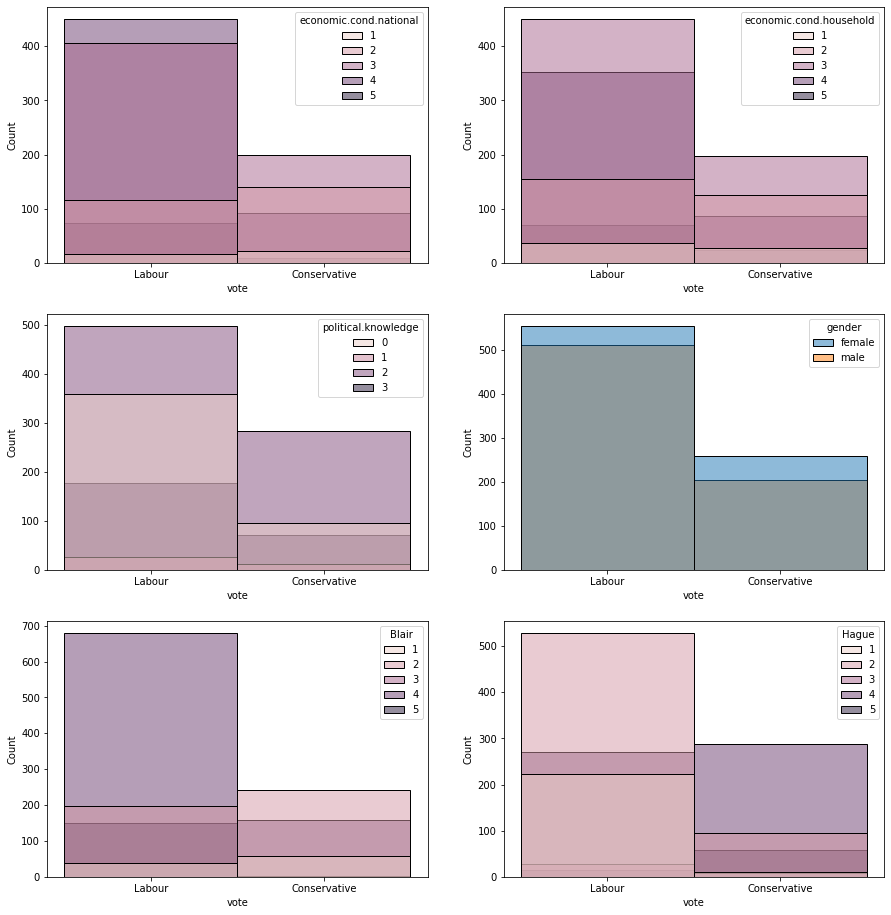

In [18]:
# plot in relation of vote feature
fig, axes = plt.subplots(nrows=3,ncols=2)
fig.set_size_inches(15,16)
sns.histplot(df,x='vote',hue='economic.cond.national',ax=axes[0][0])
sns.histplot(df,x='vote',hue='economic.cond.household',ax=axes[0][1])
sns.histplot(df,x='vote',hue='gender',ax=axes[1][1])
sns.histplot(df,x='vote',hue='political.knowledge',ax=axes[1][0])
sns.histplot(df,x='vote',hue='Blair',ax=axes[2][0])
sns.histplot(df,x='vote',hue='Hague',ax=axes[2][1])

##### Univariate Analysis

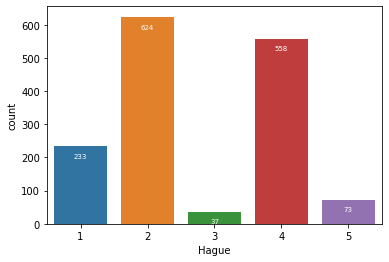

In [19]:
# Count plot
ax=sns.countplot(x=df['Hague'], data=df);
for p in ax.patches:
    ax.annotate(f'\n{p.get_height()}', (p.get_x()+0.4, p.get_height()), ha='center', va='top', color='white', size=7)

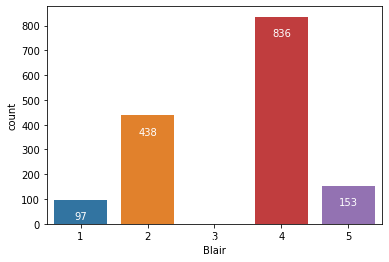

In [20]:
# Count plot
ax=sns.countplot(x=df['Blair'], data=df);
for p in ax.patches:
    ax.annotate(f'\n{p.get_height()}', (p.get_x()+0.4, p.get_height()), ha='center', va='top', color='white', size=10)

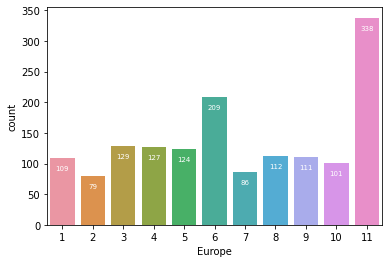

In [21]:
# Count plot
ax=sns.countplot(x=df['Europe'], data=df);
for p in ax.patches:
    ax.annotate(f'\n{p.get_height()}', (p.get_x()+0.4, p.get_height()), ha='center', va='top', color='white', size=7)

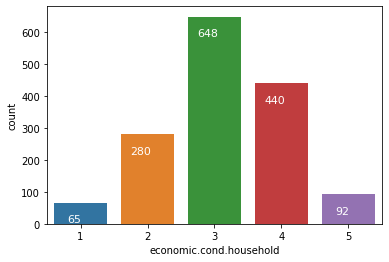

In [22]:
# Count plot
ax=sns.countplot(x=df['economic.cond.household'], data=df);
for p in ax.patches:
    ax.annotate(f'\n{p.get_height()}', (p.get_x()+0.3, p.get_height()), ha='center', va='top', color='white', size=11)

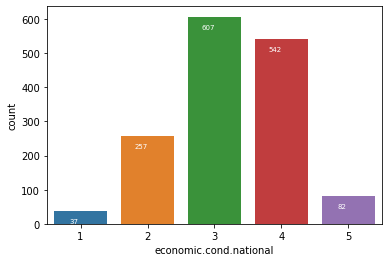

In [23]:
# Count plot
ax=sns.countplot(x=df['economic.cond.national'], data=df);
for p in ax.patches:
    ax.annotate(f'\n{p.get_height()}', (p.get_x()+0.3, p.get_height()), ha='center', va='top', color='white', size=7)

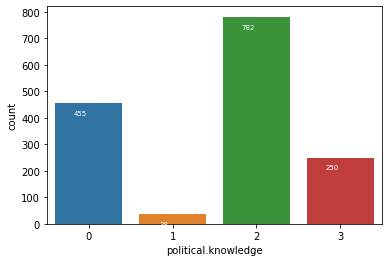

In [24]:
# Count plot
ax=sns.countplot(x=df['political.knowledge'], data=df);
for p in ax.patches:
    ax.annotate(f'\n{p.get_height()}', (p.get_x()+0.3, p.get_height()), ha='center', va='top', color='white', size=7)

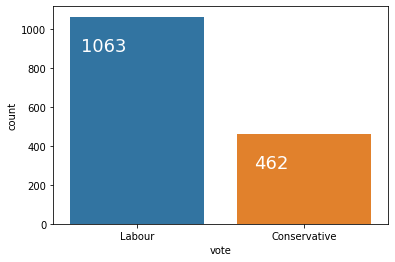

In [25]:
# Count plot
ax=sns.countplot(x=df['vote'], data=df);
for p in ax.patches:
    ax.annotate(f'\n{p.get_height()}', (p.get_x()+0.2, p.get_height()), ha='center', va='top', color='white', size=18)

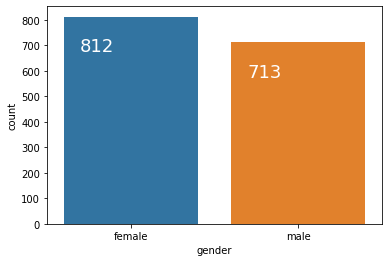

In [26]:
ax=sns.countplot(x=df['gender'], data=df);
for p in ax.patches:
    ax.annotate(f'\n{p.get_height()}', (p.get_x()+0.2, p.get_height()), ha='center', va='top', color='white', size=18)

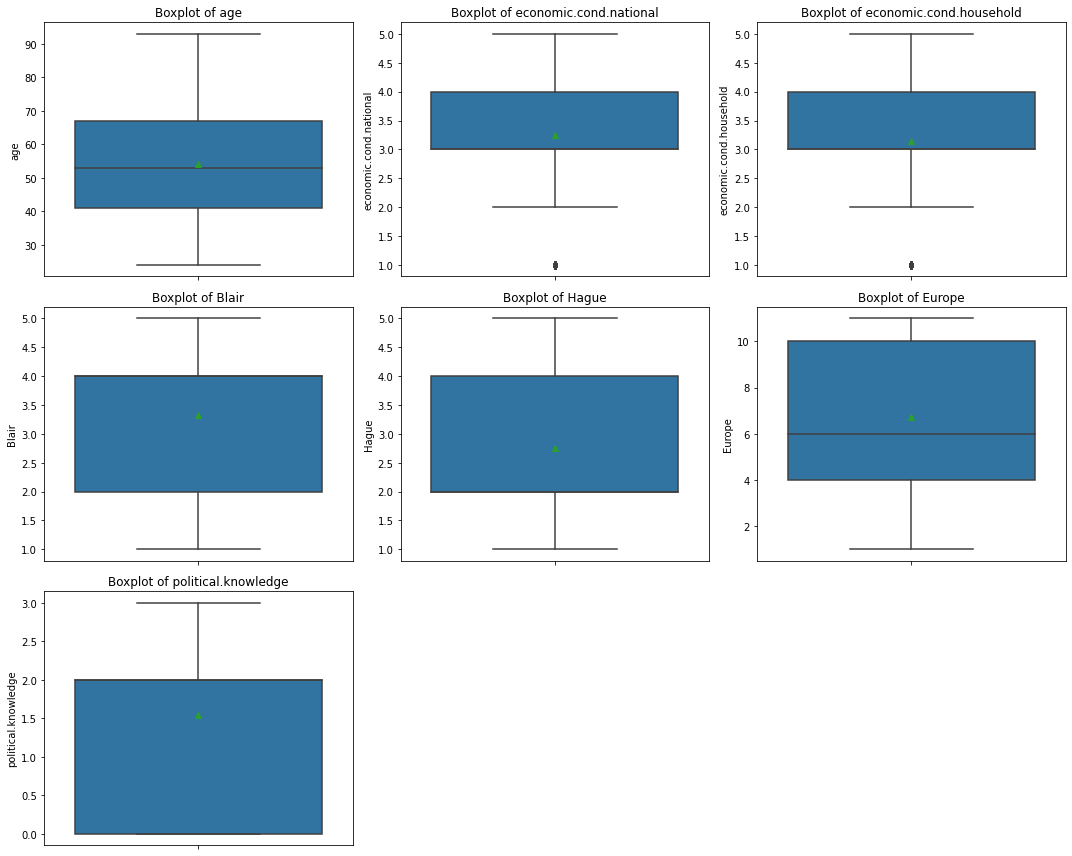

In [27]:
# boxplot of numerical variables
dfint=df[[ 'age', 'economic.cond.national', 'economic.cond.household',
       'Blair', 'Hague', 'Europe', 'political.knowledge']]
plt.figure(figsize = (15,12))
feature_list = dfint.columns
for i in range(len(feature_list)):
    plt.subplot(3, 3, i + 1)
    sns.boxplot(y = dfint[feature_list[i]], data = dfint,showmeans=True)
    plt.title('Boxplot of {}'.format(feature_list[i]))
    plt.tight_layout()

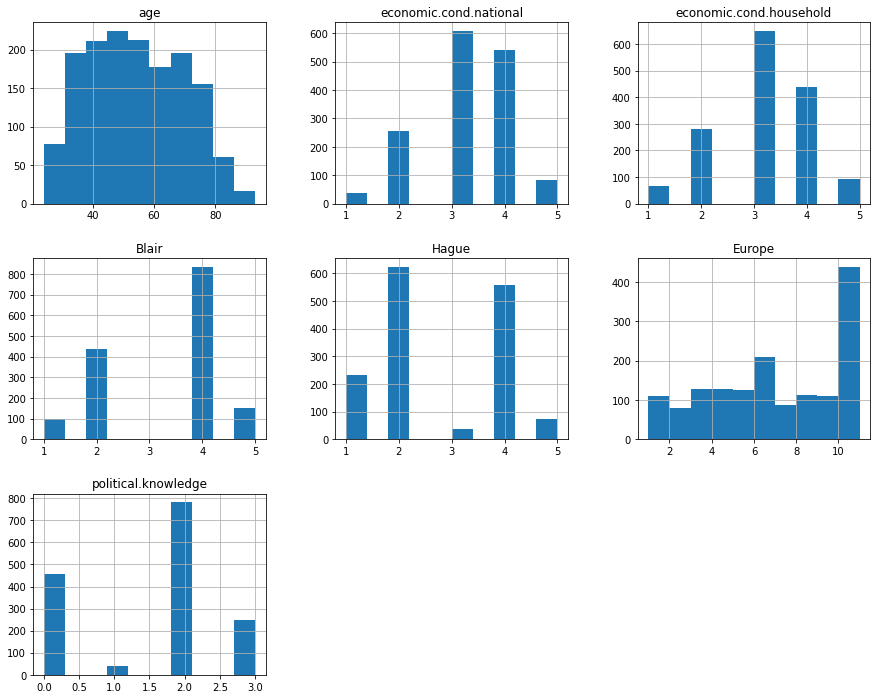

In [28]:
# histplot of all numeric variables

dfhist=dfint.hist(figsize=(15,12))

##### Multivariate Analysis

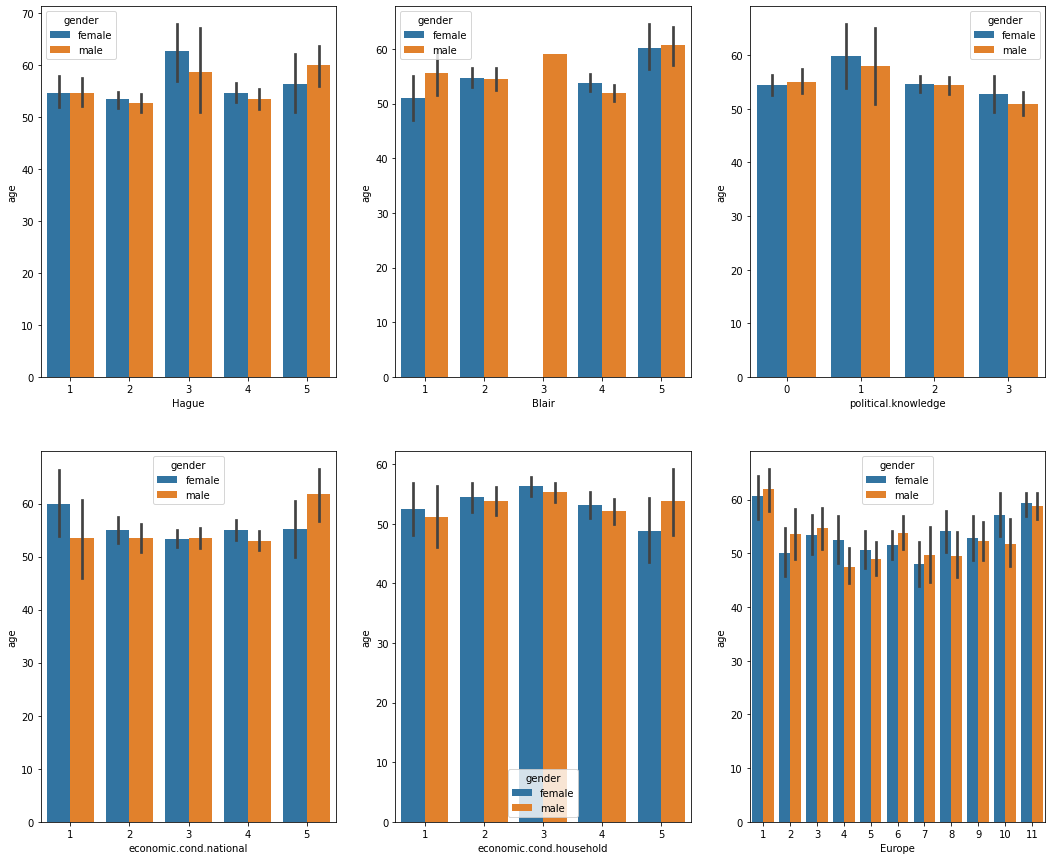

In [29]:
# plot in relation of age and gender feature
fig,axes=plt.subplots(nrows=2,ncols=3,figsize=(18,15))
sns.barplot(data=df,y='age',x='Hague',hue='gender',ax=axes[0][0]);
sns.barplot(data=df,y='age',x='Blair',hue='gender',ax=axes[0][1]);
sns.barplot(data=df,y='age',x='political.knowledge',hue='gender',ax=axes[0][2]);
sns.barplot(data=df,y='age',x='economic.cond.national',hue='gender',ax=axes[1][0]);
sns.barplot(data=df,y='age',x='economic.cond.household',hue='gender',ax=axes[1][1]);
sns.barplot(data=df,y='age',x='Europe',hue='gender',ax=axes[1][2]);

##### Portion of outliers 

In [30]:
# as there are only two feature with outliers
def find_outliers_IQR(df):
    Q1=df.quantile(0.25)
    Q3=df.quantile(0.75)
    IQR=Q3-Q1
    outliers = df[((df<(Q1-1.5*IQR)) | (df>(Q3+1.5*IQR)))]
    return outliers
print('Portion of outliers : ')
outliers = find_outliers_IQR(df['economic.cond.national'])
print('economic.cond.national :')
print('Number of outliers: '+ str(len(outliers)))
print('Proportion of outliers: '+ str(round((len(outliers)/df.shape[0])*100,2)),'%')
outliers = find_outliers_IQR(df['economic.cond.household'])
print('\neconomic.cond.household :')
print('Number of outliers: '+ str(len(outliers)))
print('Proportion of outliers: '+ str(round((len(outliers)/df.shape[0])*100,2)),'%')

Portion of outliers : 
economic.cond.national :
Number of outliers: 37
Proportion of outliers: 2.43 %

economic.cond.household :
Number of outliers: 65
Proportion of outliers: 4.26 %


## 1.3) Encode the data (having string values) for Modelling. Is Scaling necessary here or not?( 2 pts), Data Split: Split the data into train and test (70:30) (2 pts). The learner is expected to check and comment about the difference in scale of different features on the bases of appropriate measure for example std dev, variance, etc. Should justify whether there is a necessity for scaling. Object data should be converted into categorical/numerical data to fit in the models. (pd.categorical().codes(), pd.get_dummies(drop_first=True)) Data split, ratio defined for the split, train-test split should be discussed.

In [31]:
# Encode the data

df = pd.get_dummies(df, columns=['gender','vote'] ,drop_first=True)

In [32]:
df.head() # data after encoding

,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge,gender_male,vote_Labour
0,43,3,3,4,1,2,2,0,1
1,36,4,4,4,4,5,2,1,1
2,35,4,4,5,2,3,2,1,1
3,24,4,2,2,1,4,0,0,1
4,41,2,2,1,1,6,2,1,1


In [33]:
print('checking standard deviation for scaling : ')
pd.DataFrame(df.std())

checking standard deviation for scaling : 


,0
age,15.711209
economic.cond.national,0.880969
economic.cond.household,0.929951
Blair,1.174824
Hague,1.230703
Europe,3.297538
political.knowledge,1.083315
gender_male,0.499109
vote_Labour,0.459685


In [34]:
print('\nchecking variance for scaling : ')
pd.DataFrame(df.var())


checking variance for scaling : 


,0
age,246.842075
economic.cond.national,0.776107
economic.cond.household,0.864810
Blair,1.380212
Hague,1.514631
Europe,10.873759
political.knowledge,1.173571
gender_male,0.249110
vote_Labour,0.211310


In [35]:
# scaling age 
num=['age']
df[num] = df[num].apply(lambda x:(x-x.min()) / (x.max()-x.min()))

In [36]:
df.head(3) # data after scaling

,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge,gender_male,vote_Labour
0,0.275362,3,3,4,1,2,2,0,1
1,0.173913,4,4,4,4,5,2,1,1
2,0.159420,4,4,5,2,3,2,1,1


In [37]:
print('checking standard deviation after scaling : ')
pd.DataFrame(df.std())

checking standard deviation after scaling : 


,0
age,0.227699
economic.cond.national,0.880969
economic.cond.household,0.929951
Blair,1.174824
Hague,1.230703
Europe,3.297538
political.knowledge,1.083315
gender_male,0.499109
vote_Labour,0.459685


In [38]:
print('\nchecking variance after scaling : ')
pd.DataFrame(df.var())


checking variance after scaling : 


,0
age,0.051847
economic.cond.national,0.776107
economic.cond.household,0.864810
Blair,1.380212
Hague,1.514631
Europe,10.873759
political.knowledge,1.173571
gender_male,0.249110
vote_Labour,0.211310


In [39]:
# checking value count 
df['gender_male'].value_counts() 
# 0 is for female
# 1 is for male

0    812
1    713
Name: gender_male, dtype: int64

In [40]:
# checking value count
df['vote_Labour'].value_counts()
# 0 is for Conservative
# 1 is for labor

1    1063
0     462
Name: vote_Labour, dtype: int64

In [41]:
df.info() # checking datatype

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1525 entries, 0 to 1524
Data columns (total 9 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   age                      1525 non-null   float64
 1   economic.cond.national   1525 non-null   int64  
 2   economic.cond.household  1525 non-null   int64  
 3   Blair                    1525 non-null   int64  
 4   Hague                    1525 non-null   int64  
 5   Europe                   1525 non-null   int64  
 6   political.knowledge      1525 non-null   int64  
 7   gender_male              1525 non-null   uint8  
 8   vote_Labour              1525 non-null   uint8  
dtypes: float64(1), int64(6), uint8(2)
memory usage: 86.5 KB


In [42]:
# Copy all the predictor variables into X dataframe
X = df.drop('vote_Labour', axis=1)

# Copy target into the y dataframe. 
y = df[['vote_Labour']]

In [43]:
# Split X and y into training and test set in 70:30 ratio

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30 , random_state=11)

In [44]:
# checking shape of data 
print('X_train :',X_train.shape)
print('Y_train :',y_train.shape)
print('X_test :',X_test.shape)
print('Y_test :',y_test.shape)

X_train : (1067, 8)
Y_train : (1067, 1)
X_test : (458, 8)
Y_test : (458, 1)


## 1.4) Apply Logistic Regression and LDA (Linear Discriminant Analysis) (2 pts). Interpret the inferences of both model s (2 pts). Successful implementation of each model. Logical reason behind the selection of different values for the parameters involved in each model. Calculate Train and Test Accuracies for each model. Comment on the validness of models (over fitting or under fitting)

##### Logistic Regression Model

In [45]:
# Fit the Logistic Regression model
lrmodel = LogisticRegression()
lrmodel.fit(X_train, y_train)
lrmodel.get_params()

{'C': 1.0,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 100,
 'multi_class': 'auto',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': None,
 'solver': 'lbfgs',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}


-----------------logical regression model--------------------

AUC for the Training Data: 0.882
AUC for the Test Data: 0.902
CONFUSION MATRIX

 train 
 [[211 111]
 [ 67 678]] 

----------- 

test 
 [[ 90  50]
 [ 24 294]]
................................................................................................................... 
 

Classification Report of the training data:

               precision    recall  f1-score   support

           0       0.76      0.66      0.70       322
           1       0.86      0.91      0.88       745

    accuracy                           0.83      1067
   macro avg       0.81      0.78      0.79      1067
weighted avg       0.83      0.83      0.83      1067
 

---------------------------------------------------------- 

Classification Report of the test data:

               precision    recall  f1-score   support

           0       0.79      0.64      0.71       140
           1       0.85      0.92      0.89       318

    accuracy    

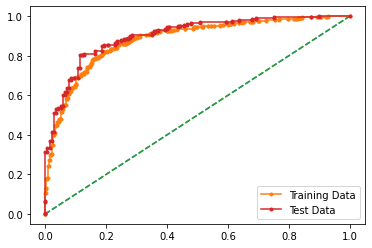

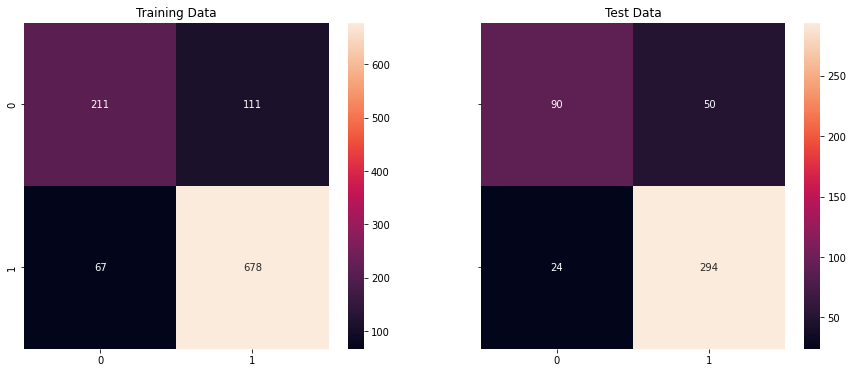

In [46]:
# AUC and ROC for the training data
print('\n-----------------logical regression model--------------------\n')

# Predicting on Training and Test dataset
ytrain_predict = lrmodel.predict(X_train)
ytest_predict = lrmodel.predict(X_test)

# Getting the Predicted probabilities
ytrain_predict_prob=lrmodel.predict_proba(X_train)
ytest_predict_prob=lrmodel.predict_proba(X_test)

# predict probabilities
probs = lrmodel.predict_proba(X_train)

# keep probabilities for the positive outcome only
probs = probs[:, 1]

# calculate AUC
auc = metrics.roc_auc_score(y_train,probs)
print('AUC for the Training Data: %.3f' % auc)

#  calculate roc curve
fpr, tpr, thresholds = metrics.roc_curve(y_train,probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.',label = 'Training Data')

# AUC and ROC for the test data

# predict probabilities
probs = lrmodel.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
auc = metrics.roc_auc_score(y_test,probs)
print('AUC for the Test Data: %.3f' % auc)

#  calculate roc curve
fpr, tpr, thresholds = metrics.roc_curve(y_test,probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.',label='Test Data')
# show the plot
plt.legend(loc='best')

# Confusion Matrix 

print('CONFUSION MATRIX')
print('\n',"train",'\n',confusion_matrix(y_train, ytrain_predict),'\n')
print('-----------','\n')
print("test",'\n',confusion_matrix(y_test, ytest_predict))
print('...................................................................................................................','\n','\n')

f,a =  plt.subplots(1,2,sharex=True,sharey=True,squeeze=False,figsize=(15,6))


#Plotting confusion matrix for the different models for the Training Data

plot_0 = sns.heatmap((metrics.confusion_matrix(y_train,ytrain_predict)),annot=True,fmt='.5g',ax=a[0][0]);
a[0][0].set_title('Training Data')

plot_1 = sns.heatmap((metrics.confusion_matrix(y_test,ytest_predict)),annot=True,fmt='.5g',ax=a[0][1]);
a[0][1].set_title('Test Data');

# Classification report
print('Classification Report of the training data:\n\n',classification_report(y_train, ytrain_predict),'\n')
print('----------------------------------------------------------','\n')
print('Classification Report of the test data:\n\n',classification_report(y_test, ytest_predict),'\n')

print('...................................................................................................................','\n','\n')

# score of datasets
print('score for train data: ',lrmodel.score(X_train,y_train))
print('score for test data: ',lrmodel.score(X_test,y_test))

Feature: 0, Score: -1.00872
Feature: 1, Score: 0.44905
Feature: 2, Score: 0.02839
Feature: 3, Score: 0.58223
Feature: 4, Score: -0.75677
Feature: 5, Score: -0.22496
Feature: 6, Score: -0.41711
Feature: 7, Score: 0.12031


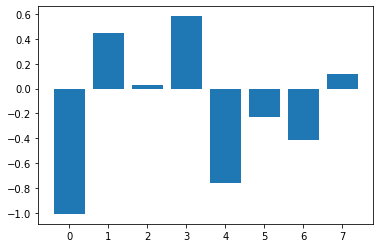

In [47]:
# get importance
importance = lrmodel.coef_[0]
# summarize feature importance
for i,v in enumerate(importance):
    print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

##### LDA

In [48]:
# Build LDA Model
clf = LinearDiscriminantAnalysis()
ldamodel=clf.fit(X,y)
ldamodel

# Coefficients and intercept for the Linear Discriminant Function
# intercept value
print('Intercept for the Linear Discriminant Function: ',ldamodel.intercept_ ,'\n')

print('-------------------------------------------------------------------------------','\n')

#coefficients for the Linear Discriminant Function
print('Coefficients for the Linear Discriminant Function')
print(ldamodel.coef_)

print('-------------------------------------------------------------------------------','\n')

# rounded up coefficients 
a=clf.coef_
print('Rounded up coefficients','\n',np.round(a,2))

# get parama of the model
print('\n',ldamodel.get_params())

Intercept for the Linear Discriminant Function:  [2.96658917] 

------------------------------------------------------------------------------- 

Coefficients for the Linear Discriminant Function
[[-1.6385851   0.42134325  0.07214287  0.76546462 -0.96351607 -0.23095452
  -0.49849114  0.06753154]]
------------------------------------------------------------------------------- 

Rounded up coefficients 
 [[-1.64  0.42  0.07  0.77 -0.96 -0.23 -0.5   0.07]]

 {'covariance_estimator': None, 'n_components': None, 'priors': None, 'shrinkage': None, 'solver': 'svd', 'store_covariance': False, 'tol': 0.0001}



-----------------best linear discriminant analysis model--------------------

Accuracy - Training Data: 0.8359887535145267
Accuracy - Test Data: 0.8296943231441049
AUC for the Training Data: 0.881
AUC for the Test Data: 0.906
train 
 [[222 100]
 [ 75 670]] 

----------- 

test 
 [[ 93  47]
 [ 31 287]]
................................................................................................................... 
 



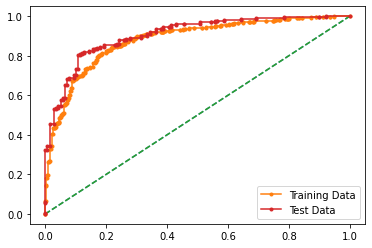

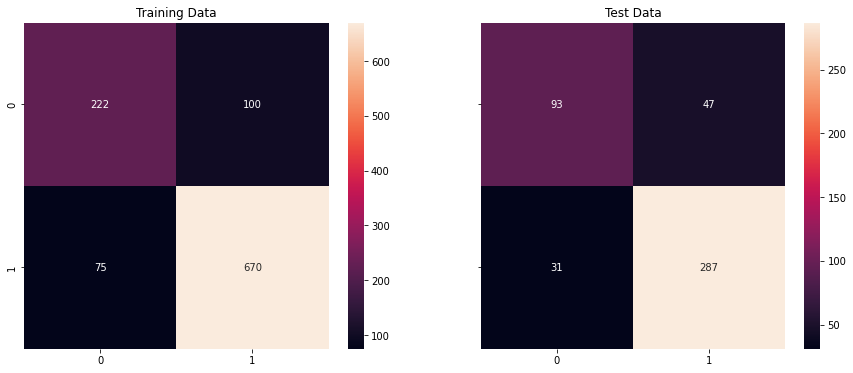

Classification Report of the training data:

               precision    recall  f1-score   support

           0       0.75      0.69      0.72       322
           1       0.87      0.90      0.88       745

    accuracy                           0.84      1067
   macro avg       0.81      0.79      0.80      1067
weighted avg       0.83      0.84      0.83      1067
 

------------------------------------------------------- 

Classification Report of the test data:

               precision    recall  f1-score   support

           0       0.75      0.66      0.70       140
           1       0.86      0.90      0.88       318

    accuracy                           0.83       458
   macro avg       0.80      0.78      0.79       458
weighted avg       0.83      0.83      0.83       458
 



In [49]:
print('\n-----------------best linear discriminant analysis model--------------------\n')

# Training Data Class Prediction 
pred_class_ytrain = ldamodel.predict(X_train)

# Test Data Class Prediction
pred_class_test = ldamodel.predict(X_test)

# Getting the Predicted probabilities
ytrain_predict_prob=ldamodel.predict_proba(X_train)
ytest_predict_prob=ldamodel.predict_proba(X_test)

# Model evaluation

# Accuracy - Training Data
print('Accuracy - Training Data:', ldamodel.score(X_train, y_train))
# Accuracy - Test Data
print("Accuracy - Test Data:",ldamodel.score(X_test, y_test))

# AUC and ROC for the training data

# predict probabilities
probs = ldamodel.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
auc = metrics.roc_auc_score(y_train,probs)
print('AUC for the Training Data: %.3f' % auc)

#  calculate roc curve
fpr, tpr, thresholds = metrics.roc_curve(y_train,probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.',label = 'Training Data')

# AUC and ROC for the test data

# predict probabilities
probs = ldamodel.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
auc = metrics.roc_auc_score(y_test,probs)
print('AUC for the Test Data: %.3f' % auc)

#  calculate roc curve
fpr, tpr, thresholds = metrics.roc_curve(y_test,probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.',label='Test Data')
# show the plot
plt.legend(loc='best')

print("train",'\n',confusion_matrix(y_train,pred_class_ytrain ),'\n')
print('-----------','\n')
print("test",'\n',confusion_matrix(y_test, pred_class_test))

print('...................................................................................................................','\n','\n')

f,a =  plt.subplots(1,2,sharex=True,sharey=True,squeeze=False,figsize=(15,6))

#Plotting confusion matrix for the different models for the Training Data

plot_0 = sns.heatmap((metrics.confusion_matrix(y_train,pred_class_ytrain)),annot=True,fmt='.5g',ax=a[0][0]);
a[0][0].set_title('Training Data')

plot_1 = sns.heatmap((metrics.confusion_matrix(y_test,pred_class_test)),annot=True,fmt='.5g',ax=a[0][1]);
a[0][1].set_title('Test Data');
plt.show()

# Classification of reports
print('Classification Report of the training data:\n\n',metrics.classification_report(y_train,pred_class_ytrain),'\n')
print('-------------------------------------------------------','\n')
print('Classification Report of the test data:\n\n',metrics.classification_report(y_test,pred_class_test),'\n')


Feature: 0, Score: -1.63859
Feature: 1, Score: 0.42134
Feature: 2, Score: 0.07214
Feature: 3, Score: 0.76546
Feature: 4, Score: -0.96352
Feature: 5, Score: -0.23095
Feature: 6, Score: -0.49849
Feature: 7, Score: 0.06753


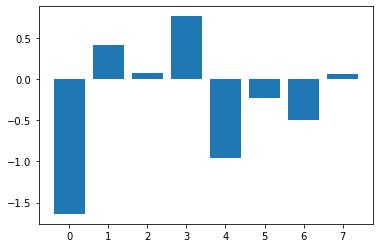

In [50]:
# get importance
importance = ldamodel.coef_[0]
# summarize feature importance
for i,v in enumerate(importance):
    print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

## 1.5) Apply KNN Model and Naïve Bayes Model (2pts). Interpret the inferences of each model (2 pts). Successful implementation of each model. Logical reason behind the selection of different values for the parameters involved in each model. Calculate Train and Test Accuracies for each model. Comment on the validness of models (over fitting or under fitting)


-----------------best KNN model--------------------

score for train data:  0.8528584817244611
score for test data:  0.8406113537117904
train
              precision    recall  f1-score   support

           0       0.78      0.71      0.74       322
           1       0.88      0.91      0.90       745

    accuracy                           0.85      1067
   macro avg       0.83      0.81      0.82      1067
weighted avg       0.85      0.85      0.85      1067

test
              precision    recall  f1-score   support

           0       0.76      0.69      0.73       140
           1       0.87      0.91      0.89       318

    accuracy                           0.84       458
   macro avg       0.82      0.80      0.81       458
weighted avg       0.84      0.84      0.84       458

AUC for the Training Data: 0.928
AUC for the Test Data: 0.865


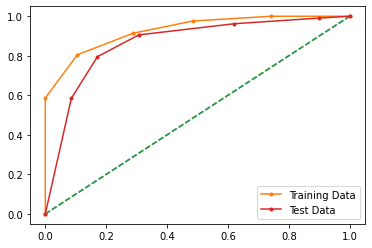

train 
 [[229  93]
 [ 64 681]] 

----------- 

test 
 [[ 97  43]
 [ 30 288]]
................................................................................................................... 
 



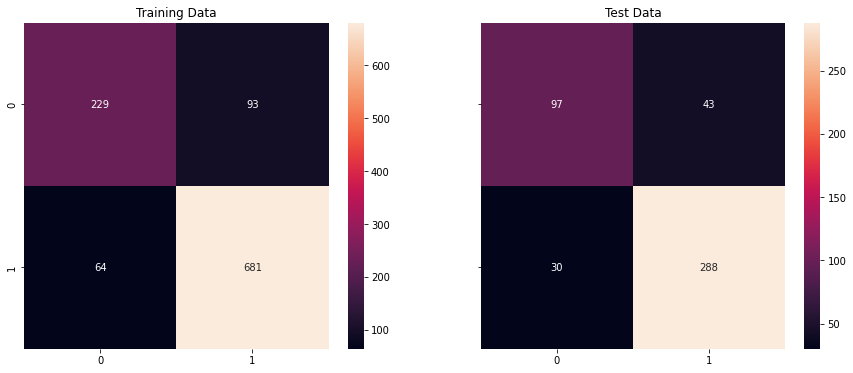

In [51]:
print('\n-----------------best KNN model--------------------\n')

from sklearn.neighbors import KNeighborsClassifier
# k Nearest Neighbour algorithm
NNH = KNeighborsClassifier()
# n_neighbors=19,metric='manhattan'
NNH.fit(X_train, y_train)
# For every test data point, predict it's label based on 5 nearest neighbours in this model. The majority class will 
# be assigned to the test data point

predicted_labels = NNH.predict(X_test)
# Training Data Class Prediction 
pred_clt = NNH.predict(X_train)

# Test Data Class Prediction
pred_cltt = NNH.predict(X_test)

# Getting the Predicted probabilities
ytrain_pre=NNH.predict_proba(X_train)
ytest_pre=NNH.predict_proba(X_test)

y_train_predict = NNH.predict(X_train)
model_score = NNH.score(X_train, y_train) 
print('score for train data: ',NNH.score(X_train, y_train))
print('score for test data: ',NNH.score(X_test, y_test))
print('train')          
print(metrics.classification_report(y_train, y_train_predict))     
print('test')

## Performance Matrix on test data set
y_test_predict = NNH.predict(X_test)
model_score = NNH.score(X_test, y_test)                          
print(metrics.classification_report(y_test, y_test_predict))    

# AUC and ROC for the training data

# predict probabilities
probs = NNH.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
auc = metrics.roc_auc_score(y_train,probs)
print('AUC for the Training Data: %.3f' % auc)

#  calculate roc curve
fpr, tpr, thresholds = metrics.roc_curve(y_train,probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.',label = 'Training Data')

# AUC and ROC for the test data

# predict probabilities
probs = NNH.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
auc = metrics.roc_auc_score(y_test,probs)
print('AUC for the Test Data: %.3f' % auc)

#  calculate roc curve
fpr, tpr, thresholds = metrics.roc_curve(y_test,probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.',label='Test Data')
# show the plot
plt.legend(loc='best')
plt.show()

print("train",'\n',confusion_matrix(y_train,pred_clt ),'\n')
print('-----------','\n')
print("test",'\n',confusion_matrix(y_test, pred_cltt))

print('...................................................................................................................','\n','\n')

f,a =  plt.subplots(1,2,sharex=True,sharey=True,squeeze=False,figsize=(15,6))

#Plotting confusion matrix for the different models for the Training Data

plot_0 = sns.heatmap((metrics.confusion_matrix(y_train,pred_clt)),annot=True,fmt='.5g',ax=a[0][0]);
a[0][0].set_title('Training Data')

plot_1 = sns.heatmap((metrics.confusion_matrix(y_test,pred_cltt)),annot=True,fmt='.5g',ax=a[0][1]);
a[0][1].set_title('Test Data');

In [52]:
# default perams of the knn model
NNH.get_params()

{'algorithm': 'auto',
 'leaf_size': 30,
 'metric': 'minkowski',
 'metric_params': None,
 'n_jobs': None,
 'n_neighbors': 5,
 'p': 2,
 'weights': 'uniform'}

Feature: 0, Score: 0.00472
Feature: 1, Score: 0.01587
Feature: 2, Score: 0.01377
Feature: 3, Score: 0.04643
Feature: 4, Score: 0.07502
Feature: 5, Score: 0.08170
Feature: 6, Score: 0.04839
Feature: 7, Score: -0.00748


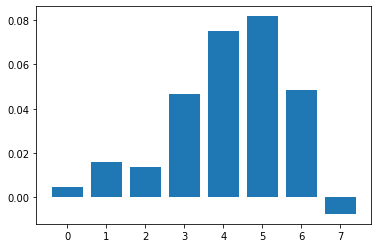

In [53]:
# get importance
from sklearn.inspection import permutation_importance
# perform permutation importance
results = permutation_importance(NNH, X, y, scoring='neg_mean_squared_error')
# get importance
importance = results.importances_mean
# summarize feature importance
for i,v in enumerate(importance):
    print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

##### Naive Bayes

In [54]:
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics
NB_model = GaussianNB()
NB_model.fit(X_train, y_train)
# Training Data Class Prediction 
pred_clt = NB_model.predict(X_train)

# Test Data Class Prediction
pred_cltt = NB_model.predict(X_test)

# Getting the Predicted probabilities
ytrain_pre=NB_model.predict_proba(X_train)
ytest_pre=NB_model.predict_proba(X_test)

In [55]:
# default perams of the knn model
NB_model.get_params()

{'priors': None, 'var_smoothing': 1e-09}

Feature: 0, Score: 0.00472
Feature: 1, Score: 0.01744
Feature: 2, Score: 0.00236
Feature: 3, Score: 0.03882
Feature: 4, Score: 0.06780
Feature: 5, Score: 0.04813
Feature: 6, Score: 0.00800
Feature: 7, Score: 0.00118


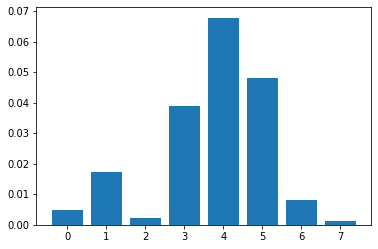

In [56]:
# perform permutation importance
results = permutation_importance(NB_model, X, y, scoring='accuracy')
# get importance
importance = results.importances_mean
# summarize feature importance
for i,v in enumerate(importance):
    print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

AUC for the Training Data: 0.878
train
              precision    recall  f1-score   support

           0       0.71      0.70      0.71       322
           1       0.87      0.88      0.88       745

    accuracy                           0.83      1067
   macro avg       0.79      0.79      0.79      1067
weighted avg       0.83      0.83      0.83      1067

test
              precision    recall  f1-score   support

           0       0.77      0.69      0.73       140
           1       0.87      0.91      0.89       318

    accuracy                           0.84       458
   macro avg       0.82      0.80      0.81       458
weighted avg       0.84      0.84      0.84       458

score for train data:  0.8256794751640113
score for test data:  0.8427947598253275
AUC for the Test Data: 0.895
train 
 [[227  95]
 [ 91 654]] 

----------- 

test 
 [[ 96  44]
 [ 28 290]]
.................................................................................................................

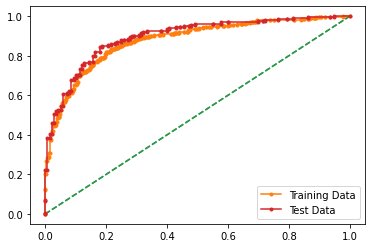

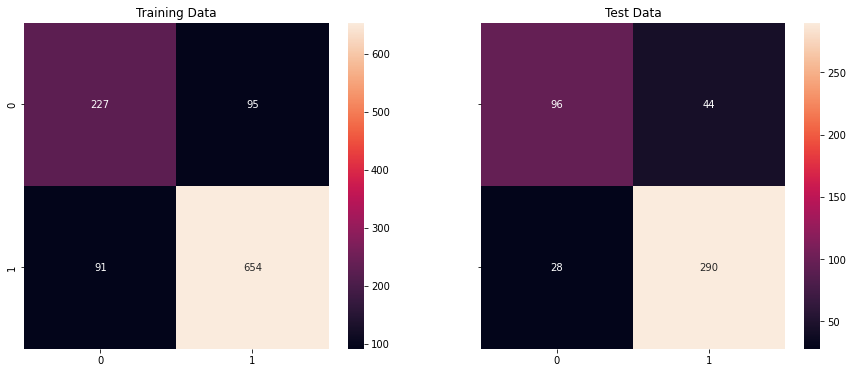

In [57]:
# AUC and ROC for the training data

# predict probabilities
probs = NB_model.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
auc = metrics.roc_auc_score(y_train,probs)
print('AUC for the Training Data: %.3f' % auc)

#  calculate roc curve
fpr, tpr, thresholds = metrics.roc_curve(y_train,probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.',label = 'Training Data')

y_train_predict = NB_model.predict(X_train)
model_score = NB_model.score(X_train, y_train)                      ## Accuracy
print('train')
print(metrics.classification_report(y_train, y_train_predict))     ## classification_report
print('test')
## Performance Matrix on test data set
y_test_predict = NB_model.predict(X_test)
model_score = NB_model.score(X_test, y_test)                    ## Accuracy
print(metrics.classification_report(y_test, y_test_predict))    ## classification_report
print('score for train data: ',NB_model.score(X_train, y_train))
print('score for test data: ',NB_model.score(X_test, y_test))

# AUC and ROC for the test data

# predict probabilities
probs = NB_model.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
auc = metrics.roc_auc_score(y_test,probs)
print('AUC for the Test Data: %.3f' % auc)

#  calculate roc curve
fpr, tpr, thresholds = metrics.roc_curve(y_test,probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.',label='Test Data')
# show the plot
plt.legend(loc='best')
print("train",'\n',confusion_matrix(y_train,pred_clt ),'\n')
print('-----------','\n')
print("test",'\n',confusion_matrix(y_test, pred_cltt))

print('...................................................................................................................','\n','\n')

f,a =  plt.subplots(1,2,sharex=True,sharey=True,squeeze=False,figsize=(15,6))

#Plotting confusion matrix for the different models for the Training Data

plot_0 = sns.heatmap((metrics.confusion_matrix(y_train,pred_clt)),annot=True,fmt='.5g',ax=a[0][0]);
a[0][0].set_title('Training Data')

plot_1 = sns.heatmap((metrics.confusion_matrix(y_test,pred_cltt)),annot=True,fmt='.5g',ax=a[0][1]);
a[0][1].set_title('Test Data');
plt.show()

## 1.6) Model Tuning (4 pts) , Bagging ( 1.5 pts) and Boosting (1.5 pts). Apply grid search on each model (include all models) and make models on best_params. Define a logic behind choosing particular values for different hyper-parameters for grid search. Compare and comment on performances of all. Comment on feature importance if applicable. Successful implementation of both algorithms along with inferences and comments on the model performances. 

###### Bagging with Random Forest Classifier

In [58]:
print('Bagging with Random Forest Classifier')
RF= RandomForestClassifier(n_estimators=100,random_state=1,max_depth=4)
Bagging_model=BaggingClassifier(base_estimator=RF,random_state=1)
Bagging_model.fit(X_train, y_train)

y_train_predict = Bagging_model.predict(X_train)
model_score = Bagging_model.score(X_train, y_train)
print('train:',model_score)
y_test_predict = Bagging_model.predict(X_test)
model_score = Bagging_model.score(X_test, y_test)
print('test:',model_score)

Bagging with Random Forest Classifier
train: 0.845360824742268
test: 0.8296943231441049


Feature: 0, Score: 0.01443
Feature: 1, Score: 0.02439
Feature: 2, Score: 0.00643
Feature: 3, Score: 0.03987
Feature: 4, Score: 0.06479
Feature: 5, Score: 0.07161
Feature: 6, Score: 0.02020
Feature: 7, Score: 0.00249


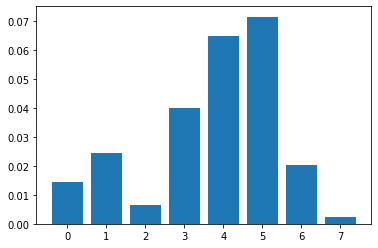

In [59]:
# perform permutation importance
results = permutation_importance(Bagging_model, X, y, scoring='accuracy')
# get importance
importance = results.importances_mean
# summarize feature importance
for i,v in enumerate(importance):
    print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

AUC for the Training Data: 0.910
train
              precision    recall  f1-score   support

           0       0.84      0.60      0.70       322
           1       0.85      0.95      0.90       745

    accuracy                           0.85      1067
   macro avg       0.84      0.78      0.80      1067
weighted avg       0.84      0.85      0.84      1067

test
              precision    recall  f1-score   support

           0       0.84      0.54      0.66       140
           1       0.83      0.96      0.89       318

    accuracy                           0.83       458
   macro avg       0.84      0.75      0.77       458
weighted avg       0.83      0.83      0.82       458

AUC for the Test Data: 0.909


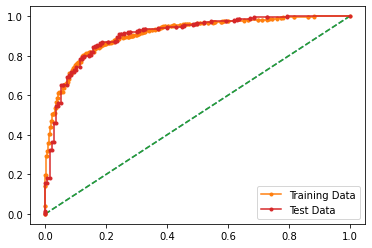

In [120]:
# AUC and ROC for the training data

# predict probabilities
probs = Bagging_model.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
auc = metrics.roc_auc_score(y_train,probs)
print('AUC for the Training Data: %.3f' % auc)

#  calculate roc curve
fpr, tpr, thresholds = metrics.roc_curve(y_train,probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.',label = 'Training Data')

y_train_predict = Bagging_model.predict(X_train)
model_score = Bagging_model.score(X_train, y_train)                      ## Accuracy
print('train')
print(metrics.classification_report(y_train, y_train_predict))     ## classification_report
print('test')
## Performance Matrix on test data set
y_test_predict = Bagging_model.predict(X_test)
model_score = Bagging_model.score(X_test, y_test)                    ## Accuracy
print(metrics.classification_report(y_test, y_test_predict))    ## classification_report

# AUC and ROC for the test data

# predict probabilities
probs = Bagging_model.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
auc = metrics.roc_auc_score(y_test,probs)
print('AUC for the Test Data: %.3f' % auc)

#  calculate roc curve
fpr, tpr, thresholds = metrics.roc_curve(y_test,probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.',label='Test Data')
# show the plot
plt.legend(loc='best')


In [121]:
Bagging_model.get_params()

{'base_estimator__bootstrap': True,
 'base_estimator__ccp_alpha': 0.0,
 'base_estimator__class_weight': None,
 'base_estimator__criterion': 'gini',
 'base_estimator__max_depth': 4,
 'base_estimator__max_features': 'auto',
 'base_estimator__max_leaf_nodes': None,
 'base_estimator__max_samples': None,
 'base_estimator__min_impurity_decrease': 0.0,
 'base_estimator__min_samples_leaf': 1,
 'base_estimator__min_samples_split': 2,
 'base_estimator__min_weight_fraction_leaf': 0.0,
 'base_estimator__n_estimators': 100,
 'base_estimator__n_jobs': None,
 'base_estimator__oob_score': False,
 'base_estimator__random_state': 1,
 'base_estimator__verbose': 0,
 'base_estimator__warm_start': False,
 'base_estimator': RandomForestClassifier(max_depth=4, random_state=1),
 'bootstrap': True,
 'bootstrap_features': False,
 'max_features': 1.0,
 'max_samples': 1.0,
 'n_estimators': 10,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 1,
 'verbose': 0,
 'warm_start': False}

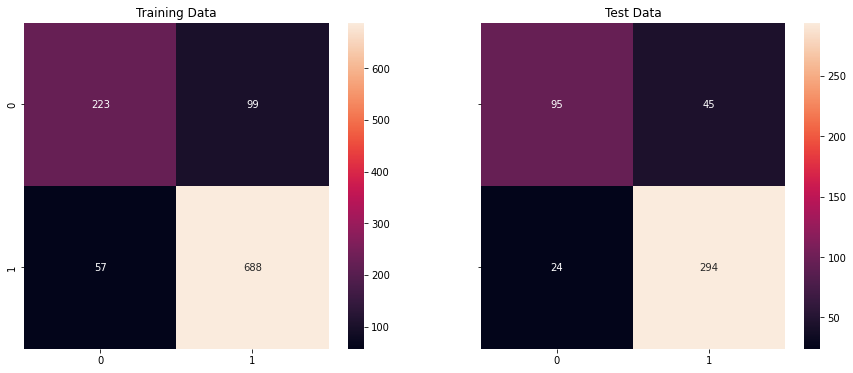

In [122]:
# Plotting confusion matrix for the different models for the Training Data
f,a =  plt.subplots(1,2,sharex=True,sharey=True,squeeze=False,figsize=(15,6))

plot_0 = sns.heatmap((metrics.confusion_matrix(y_train,pred_clt)),annot=True,fmt='.5g',ax=a[0][0]);
a[0][0].set_title('Training Data')

plot_1 = sns.heatmap((metrics.confusion_matrix(y_test,pred_cltt)),annot=True,fmt='.5g',ax=a[0][1]);
a[0][1].set_title('Test Data');

##### boosting model

In [62]:
print('ADA Boosting')
ADB_model = AdaBoostClassifier(n_estimators=50,random_state=1)
ADB_model.fit(X_train,y_train)

y_train_predict = ADB_model.predict(X_train)
model_score = ADB_model.score(X_train, y_train)
print('train:',model_score)
y_test_predict = ADB_model.predict(X_test)
model_score = ADB_model.score(X_test, y_test)
print('test:',model_score)

ADA Boosting
train: 0.837863167760075
test: 0.8406113537117904


In [63]:
ADB_model.get_params()

{'algorithm': 'SAMME.R',
 'base_estimator': None,
 'learning_rate': 1.0,
 'n_estimators': 50,
 'random_state': 1}

Feature: 0, Score: 0.01797
Feature: 1, Score: 0.01469
Feature: 2, Score: 0.00144
Feature: 3, Score: 0.04302
Feature: 4, Score: 0.07318
Feature: 5, Score: 0.03305
Feature: 6, Score: 0.00944
Feature: 7, Score: 0.00000


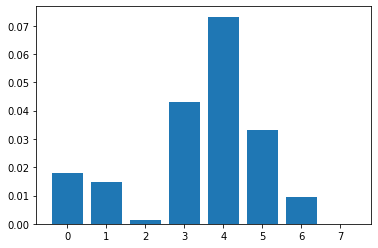

In [64]:
# perform permutation importance
results = permutation_importance(ADB_model, X, y, scoring='accuracy')
# get importance
importance = results.importances_mean
# summarize feature importance
for i,v in enumerate(importance):
    print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

AUC for the Training Data: 0.903
train
              precision    recall  f1-score   support

           0       0.75      0.69      0.72       322
           1       0.87      0.90      0.89       745

    accuracy                           0.84      1067
   macro avg       0.81      0.80      0.80      1067
weighted avg       0.83      0.84      0.84      1067

test
              precision    recall  f1-score   support

           0       0.77      0.69      0.72       140
           1       0.87      0.91      0.89       318

    accuracy                           0.84       458
   macro avg       0.82      0.80      0.81       458
weighted avg       0.84      0.84      0.84       458

AUC for the Test Data: 0.901


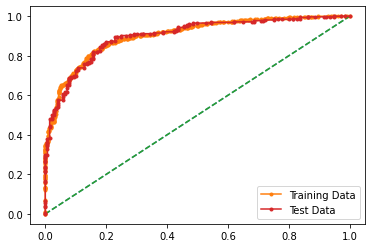

In [123]:
# AUC and ROC for the training data
a=ADB_model
# predict probabilities
probs = a.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
auc = metrics.roc_auc_score(y_train,probs)
print('AUC for the Training Data: %.3f' % auc)

#  calculate roc curve
fpr, tpr, thresholds = metrics.roc_curve(y_train,probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.',label = 'Training Data')

y_train_predict = a.predict(X_train)
model_score = a.score(X_train, y_train)                      ## Accuracy
print('train')
print(metrics.classification_report(y_train, y_train_predict))     ## classification_report
print('test')
## Performance Matrix on test data set
y_test_predict = a.predict(X_test)
model_score = a.score(X_test, y_test)                    ## Accuracy
print(metrics.classification_report(y_test, y_test_predict))    ## classification_report

# AUC and ROC for the test data

# predict probabilities
probs = a.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
auc = metrics.roc_auc_score(y_test,probs)
print('AUC for the Test Data: %.3f' % auc)

#  calculate roc curve
fpr, tpr, thresholds = metrics.roc_curve(y_test,probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.',label='Test Data')
# show the plot
plt.legend(loc='best')

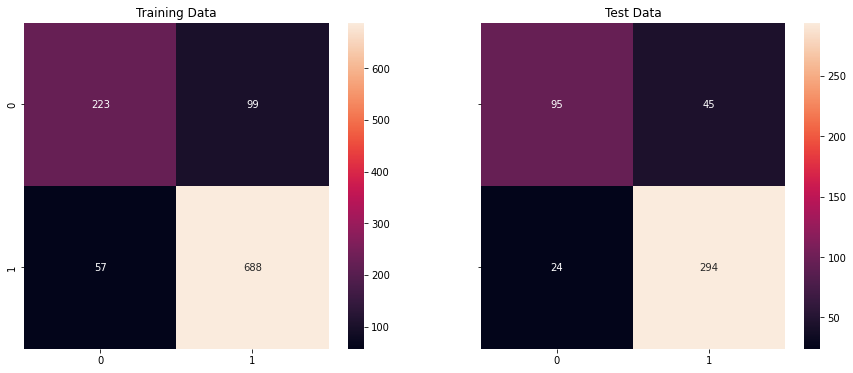

In [124]:
# Plotting confusion matrix for the different models for the Training Data
f,a =  plt.subplots(1,2,sharex=True,sharey=True,squeeze=False,figsize=(15,6))

plot_0 = sns.heatmap((metrics.confusion_matrix(y_train,pred_clt)),annot=True,fmt='.5g',ax=a[0][0]);
a[0][0].set_title('Training Data')

plot_1 = sns.heatmap((metrics.confusion_matrix(y_test,pred_cltt)),annot=True,fmt='.5g',ax=a[0][1]);
a[0][1].set_title('Test Data');

###### Gradient Boosting

In [66]:
print('Gradient Boosting')
gbcl = GradientBoostingClassifier()
gbcl = gbcl.fit(X_train, y_train)

y_train_predict = gbcl.predict(X_train)
model_score = gbcl.score(X_train, y_train)
print('train:',model_score)
y_test_predict = gbcl.predict(X_test)
model_score = gbcl.score(X_test, y_test)
print('test:',model_score)

Gradient Boosting
train: 0.8856607310215557
test: 0.8558951965065502


In [67]:
gbcl.get_params()

{'ccp_alpha': 0.0,
 'criterion': 'friedman_mse',
 'init': None,
 'learning_rate': 0.1,
 'loss': 'deviance',
 'max_depth': 3,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_iter_no_change': None,
 'random_state': None,
 'subsample': 1.0,
 'tol': 0.0001,
 'validation_fraction': 0.1,
 'verbose': 0,
 'warm_start': False}

Feature: 0, Score: 0.03764
Feature: 1, Score: 0.02466
Feature: 2, Score: 0.00511
Feature: 3, Score: 0.05010
Feature: 4, Score: 0.09180
Feature: 5, Score: 0.07607
Feature: 6, Score: 0.03475
Feature: 7, Score: 0.00157


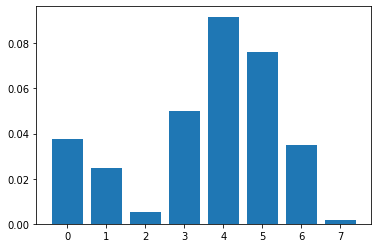

In [68]:
# perform permutation importance
results = permutation_importance(gbcl, X, y, scoring='accuracy')
# get importance
importance = results.importances_mean
# summarize feature importance
for i,v in enumerate(importance):
    print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

AUC for the Training Data: 0.949
train
              precision    recall  f1-score   support

           0       0.83      0.78      0.80       322
           1       0.91      0.93      0.92       745

    accuracy                           0.89      1067
   macro avg       0.87      0.85      0.86      1067
weighted avg       0.88      0.89      0.88      1067

test
              precision    recall  f1-score   support

           0       0.82      0.67      0.74       140
           1       0.87      0.94      0.90       318

    accuracy                           0.86       458
   macro avg       0.85      0.80      0.82       458
weighted avg       0.85      0.86      0.85       458

AUC for the Test Data: 0.908


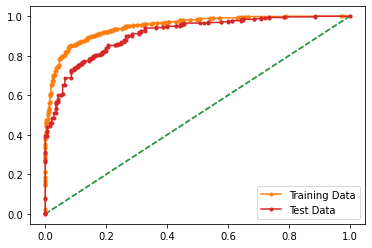

In [115]:
# AUC and ROC for the training data
a=gbcl
# predict probabilities
probs = a.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
auc = metrics.roc_auc_score(y_train,probs)
print('AUC for the Training Data: %.3f' % auc)

#  calculate roc curve
fpr, tpr, thresholds = metrics.roc_curve(y_train,probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.',label = 'Training Data')

y_train_predict = a.predict(X_train)
model_score = a.score(X_train, y_train)                      ## Accuracy
print('train')
print(metrics.classification_report(y_train, y_train_predict))     ## classification_report
print('test')
## Performance Matrix on test data set
y_test_predict = a.predict(X_test)
model_score = a.score(X_test, y_test)                    ## Accuracy
print(metrics.classification_report(y_test, y_test_predict))    ## classification_report

# AUC and ROC for the test data

# predict probabilities
probs = a.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
auc = metrics.roc_auc_score(y_test,probs)
print('AUC for the Test Data: %.3f' % auc)

#  calculate roc curve
fpr, tpr, thresholds = metrics.roc_curve(y_test,probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.',label='Test Data')
# show the plot
plt.legend(loc='best')

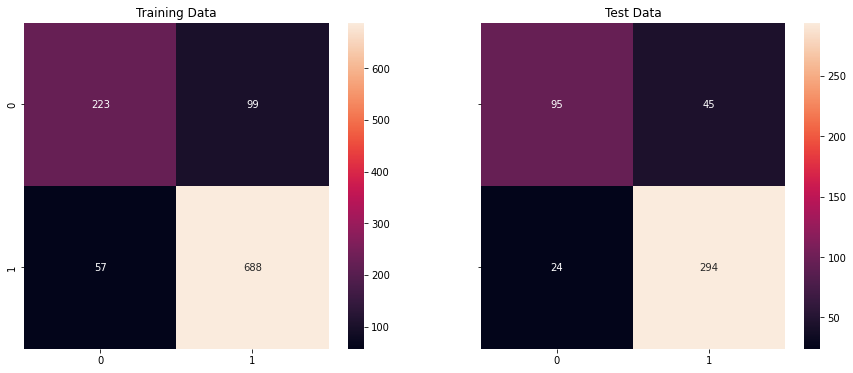

In [118]:
# Plotting confusion matrix for the different models for the Training Data
f,a =  plt.subplots(1,2,sharex=True,sharey=True,squeeze=False,figsize=(15,6))

plot_0 = sns.heatmap((metrics.confusion_matrix(y_train,pred_clt)),annot=True,fmt='.5g',ax=a[0][0]);
a[0][0].set_title('Training Data')

plot_1 = sns.heatmap((metrics.confusion_matrix(y_test,pred_cltt)),annot=True,fmt='.5g',ax=a[0][1]);
a[0][1].set_title('Test Data');

## ------------------------------tunning model-------------------------------------

###### logical regression

In [70]:
# tunnning models
grid={'C':[-1,1,10,0.001, 0.01, 0.1, 1, 10, 100, 1000],
      'max_iter':[100,200,300],
      'penalty':['l1','l2','none'],
      'solver':['saga','newton-cg'],
      'tol':[0.0001,0.00002]}
model = LogisticRegression(max_iter=10000,n_jobs=2)
clflr = GridSearchCV(estimator = model, param_grid = grid, cv = 5,n_jobs=-1,scoring='accuracy')
clflr.fit(X_train, y_train)
print('Logistic Regression tunning model:')
print('best score',clflr.best_score_)
print('best params',clflr.best_params_)
print('\n')
blrmodel=clflr.best_estimator_

Logistic Regression tunning model:
best score 0.8331797639419068
best params {'C': 0.1, 'max_iter': 100, 'penalty': 'l2', 'solver': 'newton-cg', 'tol': 0.0001}




In [71]:
# Predicting on Training and Test dataset
ytrain_predict = blrmodel.predict(X_train)
ytest_predict = blrmodel.predict(X_test)

# Getting the Predicted probabilities
ytrain_predict_prob=blrmodel.predict_proba(X_train)
ytest_predict_prob=blrmodel.predict_proba(X_test)
# Model evaluation
print('lr best model')
# Accuracy - Training Data
print('Accuracy - Training Data:', blrmodel.score(X_train, y_train),)
# Accuracy - Test Data
print("Accuracy - Test Data:",blrmodel.score(X_test, y_test))

lr best model
Accuracy - Training Data: 0.8331771321462043
Accuracy - Test Data: 0.834061135371179


In [72]:
clflr

GridSearchCV(cv=5, estimator=LogisticRegression(max_iter=10000, n_jobs=2),
             n_jobs=-1,
             param_grid={'C': [-1, 1, 10, 0.001, 0.01, 0.1, 1, 10, 100, 1000],
                         'max_iter': [100, 200, 300],
                         'penalty': ['l1', 'l2', 'none'],
                         'solver': ['saga', 'newton-cg'],
                         'tol': [0.0001, 2e-05]},
             scoring='accuracy')

Feature: 0, Score: -0.46391
Feature: 1, Score: 0.40846
Feature: 2, Score: 0.05538
Feature: 3, Score: 0.54615
Feature: 4, Score: -0.71602
Feature: 5, Score: -0.22793
Feature: 6, Score: -0.38655
Feature: 7, Score: 0.10026


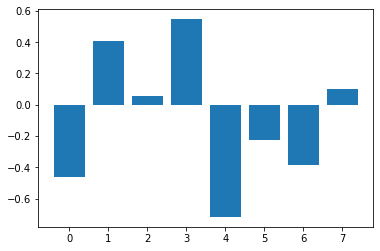

In [73]:
# get importance
importance = blrmodel.coef_[0]
# summarize feature importance
for i,v in enumerate(importance):
    print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

###### Linear Discriminant Analysis

In [74]:
# Linear Discriminant Analysis
grid={'solver':['svd','eigen','lsqr'],
      'shrinkage':[0.01,0.001,'none','auto'],
      'n_components':[1,2,3,4,5,6,7],
      'tol':[0.0001,0.00001]}
model = LinearDiscriminantAnalysis()
clfLDA = GridSearchCV(estimator = model, param_grid = grid, cv = 5,n_jobs=-1,scoring='f1')
clfLDA.fit(X_train, y_train)
print(clfLDA.best_params_)
print(clfLDA.best_score_)
print('\n')
bldamodel=clfLDA.best_estimator_
# Predicting on Training and Test dataset
ytrain_predict = bldamodel.predict(X_train)
ytest_predict = bldamodel.predict(X_test)

# Getting the Predicted probabilities
ytrain_predict_prob=bldamodel.predict_proba(X_train)
ytest_predict_prob=bldamodel.predict_proba(X_test)
# Model evaluation
print('lda best model')
# Accuracy - Training Data
print('Accuracy - Training Data:', bldamodel.score(X_train, y_train),)
# Accuracy - Test Data
print("Accuracy - Test Data:",bldamodel.score(X_test, y_test))

{'n_components': 1, 'shrinkage': 0.01, 'solver': 'eigen', 'tol': 0.0001}
0.8854657263013802


lda best model
Accuracy - Training Data: 0.8359887535145267
Accuracy - Test Data: 0.834061135371179


In [75]:
clfLDA

GridSearchCV(cv=5, estimator=LinearDiscriminantAnalysis(), n_jobs=-1,
             param_grid={'n_components': [1, 2, 3, 4, 5, 6, 7],
                         'shrinkage': [0.01, 0.001, 'none', 'auto'],
                         'solver': ['svd', 'eigen', 'lsqr'],
                         'tol': [0.0001, 1e-05]},
             scoring='f1')

Feature: 0, Score: -1.16073
Feature: 1, Score: 0.44242
Feature: 2, Score: 0.05407
Feature: 3, Score: 0.69380
Feature: 4, Score: -0.86297
Feature: 5, Score: -0.23847
Feature: 6, Score: -0.50095
Feature: 7, Score: 0.07363


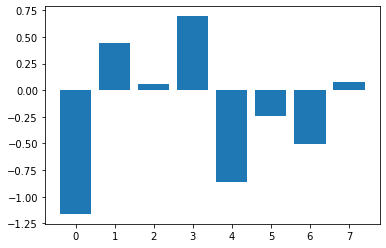

In [76]:
# get importance
importance = bldamodel.coef_[0]
# summarize feature importance
for i,v in enumerate(importance):
    print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

#####  Naive Bayes Model

In [77]:
# Naive Bayes Model
grid={'var_smoothing':[1e-01,1e-03,1e-05,1e-07,1e-09]}
model = GaussianNB()
clfNB = GridSearchCV(estimator = model, param_grid = grid, cv = 5,n_jobs=2,scoring='accuracy')
clfNB.fit(X_train,y_train)
print(clfNB.best_params_)
print(clfNB.best_score_)
print('\n')
bnbmodel=clfNB.best_estimator_
# Predicting on Training and Test dataset
ytrain_predict = bnbmodel.predict(X_train)
ytest_predict = bnbmodel.predict(X_test)

# Getting the Predicted probabilities
ytrain_predict_prob=bnbmodel.predict_proba(X_train)
ytest_predict_prob=bnbmodel.predict_proba(X_test)
# Model evaluation
print('gaussian nb best model')
# Accuracy - Training Data
print('Training Data:', bnbmodel.score(X_train, y_train),)
# Accuracy - Test Data
print("Test Data:",bnbmodel.score(X_test, y_test))

{'var_smoothing': 1e-05}
0.8209863542626475


gaussian nb best model
Training Data: 0.8256794751640113
Test Data: 0.8427947598253275


In [78]:
clfNB

GridSearchCV(cv=5, estimator=GaussianNB(), n_jobs=2,
             param_grid={'var_smoothing': [0.1, 0.001, 1e-05, 1e-07, 1e-09]},
             scoring='accuracy')

Feature: 0, Score: 0.00407
Feature: 1, Score: 0.01416
Feature: 2, Score: 0.00354
Feature: 3, Score: 0.04026
Feature: 4, Score: 0.06780
Feature: 5, Score: 0.04721
Feature: 6, Score: 0.01089
Feature: 7, Score: 0.00197


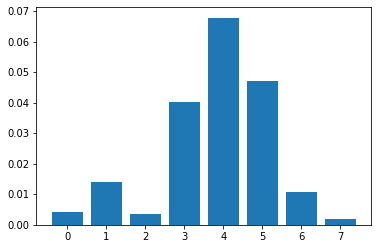

In [79]:
# get importance
from sklearn.inspection import permutation_importance
# perform permutation importance
results = permutation_importance(bnbmodel, X, y, scoring='neg_mean_squared_error')
# get importance
importance = results.importances_mean
# summarize feature importance
for i,v in enumerate(importance):
    print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

#####  KNN Model

In [80]:
# KNN Model
grid={'n_neighbors':[1,3,5,7,9,11,13,15,17,19,21],
      'weights':['uniform','distance'],
      'algorithm':['auto','ball_tree', 'kd_tree', 'brute'],
      'leaf_size':[30,60,90],
      'metric':['euclidean','manhattan','minkowski']
      }
model = KNeighborsClassifier()
clfKNN = GridSearchCV(estimator = model, param_grid = grid, cv = 3,n_jobs=2,scoring='f1')
clfKNN.fit(X_train,y_train)
print(clfKNN.best_params_)
print(clfKNN.best_score_)
print('\n')
knnmodel=clfKNN.best_estimator_
# Predicting on Training and Test dataset
ytrain_predict = knnmodel.predict(X_train)
ytest_predict = knnmodel.predict(X_test)

# Getting the Predicted probabilities
ytrain_predict_prob=knnmodel.predict_proba(X_train)
ytest_predict_prob=knnmodel.predict_proba(X_test)
# Model evaluation
print('knn best model')
# Accuracy - Training Data
print('Accuracy - Training Data:', knnmodel.score(X_train, y_train),)
# Accuracy - Test Data
print("Accuracy - Test Data:",knnmodel.score(X_test, y_test))

{'algorithm': 'ball_tree', 'leaf_size': 60, 'metric': 'manhattan', 'n_neighbors': 17, 'weights': 'uniform'}
0.8779886230664916


knn best model
Accuracy - Training Data: 0.8537956888472352
Accuracy - Test Data: 0.8493449781659389


Feature: 0, Score: 0.01075
Feature: 1, Score: 0.02020
Feature: 2, Score: 0.00839
Feature: 3, Score: 0.03672
Feature: 4, Score: 0.07344
Feature: 5, Score: 0.08682
Feature: 6, Score: 0.04013
Feature: 7, Score: 0.00603


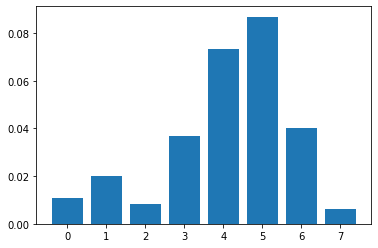

In [81]:
# get importance
from sklearn.inspection import permutation_importance
# perform permutation importance
results = permutation_importance(knnmodel, X, y, scoring='neg_mean_squared_error')
# get importance
importance = results.importances_mean
# summarize feature importance
for i,v in enumerate(importance):
    print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

In [82]:
clfKNN

GridSearchCV(cv=3, estimator=KNeighborsClassifier(), n_jobs=2,
             param_grid={'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
                         'leaf_size': [30, 60, 90],
                         'metric': ['euclidean', 'manhattan', 'minkowski'],
                         'n_neighbors': [1, 3, 5, 7, 9, 11, 13, 15, 17, 19, 21],
                         'weights': ['uniform', 'distance']},
             scoring='f1')

##### Bagging

In [83]:
# Bagging
grid={'n_estimators':[10,50,100],
      'max_samples':[50,100,1000],
      'max_features':[2,4,5,6,7,8,9],
      'bootstrap':['True','False'],
      'bootstrap_features':['True','False'],
      'oob_score':['True','False'],
      }
model = BaggingClassifier()
clfb = GridSearchCV(estimator = model, param_grid = grid, cv = 3,n_jobs=2,scoring='f1')
clfb.fit(X_train,y_train)
print(clfb.best_params_)
print(clfb.best_score_)
print('\n')
bmodel=clfb.best_estimator_
# Predicting on Training and Test dataset
ytrain_predict = bmodel.predict(X_train)
ytest_predict = bmodel.predict(X_test)

# Getting the Predicted probabilities
ytrain_predict_prob=bmodel.predict_proba(X_train)
ytest_predict_prob=bmodel.predict_proba(X_test)
# Model evaluation
print('bagging best model')
# Accuracy - Training Data
print('Accuracy - Training Data:', bmodel.score(X_train, y_train),)
# Accuracy - Test Data
print("Accuracy - Test Data:",bmodel.score(X_test, y_test))

{'bootstrap': 'True', 'bootstrap_features': 'True', 'max_features': 8, 'max_samples': 100, 'n_estimators': 50, 'oob_score': 'False'}
0.8827750731059038


bagging best model
Accuracy - Training Data: 0.8434864104967198
Accuracy - Test Data: 0.8165938864628821


In [84]:
clfb

GridSearchCV(cv=3, estimator=BaggingClassifier(), n_jobs=2,
             param_grid={'bootstrap': ['True', 'False'],
                         'bootstrap_features': ['True', 'False'],
                         'max_features': [2, 4, 5, 6, 7, 8, 9],
                         'max_samples': [50, 100, 1000],
                         'n_estimators': [10, 50, 100],
                         'oob_score': ['True', 'False']},
             scoring='f1')

Feature: 0, Score: 0.01508
Feature: 1, Score: 0.01731
Feature: 2, Score: 0.00577
Feature: 3, Score: 0.03882
Feature: 4, Score: 0.06190
Feature: 5, Score: 0.04118
Feature: 6, Score: 0.01823
Feature: 7, Score: 0.00446


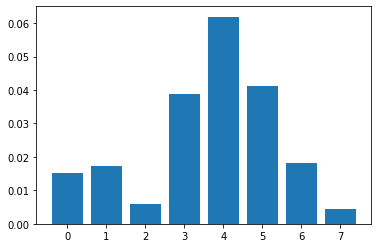

In [85]:
# get importance
from sklearn.inspection import permutation_importance
# perform permutation importance
results = permutation_importance(bmodel, X, y, scoring='neg_mean_squared_error')
# get importance
importance = results.importances_mean
# summarize feature importance
for i,v in enumerate(importance):
    print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

##### Ada Boosting

In [86]:
# Ada Boosting
grid={'n_estimators':[10,50,100,200],
      'algorithm':['SAMME','SAMME.R'],
      }
model = AdaBoostClassifier(random_state=1)
clfADB = GridSearchCV(estimator = model, param_grid = grid, cv = 3,n_jobs=2,scoring='f1')
clfADB.fit(X_train,y_train)
print(clfADB.best_params_)
print(clfADB.best_score_)
print('\n')
adbmodel=clfADB.best_estimator_
# Predicting on Training and Test dataset
ytrain_predict = adbmodel.predict(X_train)
ytest_predict = adbmodel.predict(X_test)

# Getting the Predicted probabilities
ytrain_predict_prob=adbmodel.predict_proba(X_train)
ytest_predict_prob=adbmodel.predict_proba(X_test)
# Model evaluation
print('ada boosting best model')
# Accuracy - Training Data
print('Accuracy - Training Data:', adbmodel.score(X_train, y_train),)
# Accuracy - Test Data
print("Accuracy - Test Data:",adbmodel.score(X_test, y_test))

{'algorithm': 'SAMME', 'n_estimators': 100}
0.8755085053883992


ada boosting best model
Accuracy - Training Data: 0.8284910965323337
Accuracy - Test Data: 0.851528384279476


In [87]:
clfADB

GridSearchCV(cv=3, estimator=AdaBoostClassifier(random_state=1), n_jobs=2,
             param_grid={'algorithm': ['SAMME', 'SAMME.R'],
                         'n_estimators': [10, 50, 100, 200]},
             scoring='f1')

Feature: 0, Score: 0.00656
Feature: 1, Score: 0.01246
Feature: 2, Score: -0.00144
Feature: 3, Score: 0.05102
Feature: 4, Score: 0.06623
Feature: 5, Score: 0.04616
Feature: 6, Score: 0.00866
Feature: 7, Score: 0.00000


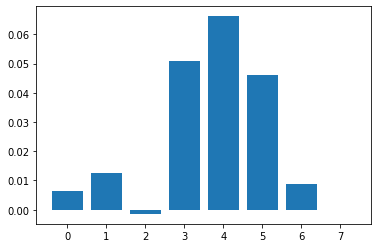

In [88]:
# get importance
from sklearn.inspection import permutation_importance
# perform permutation importance
results = permutation_importance(adbmodel, X, y, scoring='neg_mean_squared_error')
# get importance
importance = results.importances_mean
# summarize feature importance
for i,v in enumerate(importance):
    print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

##### gradient Boosting

In [89]:
# gradient Boosting
grid={'loss':['log_loss','deviance','exponential'],
      'n_estimators':[10,50,100],
      'min_samples_split':[2,10,100],
      'min_samples_leaf':[1,10,100,1000],
      'max_depth':[3,4,5,6],
      'tol':[0.0001,0.00001],
      }
model = GradientBoostingClassifier()
clfgb = GridSearchCV(estimator = model, param_grid = grid, cv = 3,n_jobs=2,scoring='f1')
clfgb.fit(X_train,y_train)
print(clfgb.best_params_)
print(clfgb.best_score_)
print('\n')
bgbmodel=clfADB.best_estimator_
# Predicting on Training and Test dataset
ytrain_predict = bgbmodel.predict(X_train)
ytest_predict = bgbmodel.predict(X_test)

# Getting the Predicted probabilities
ytrain_predict_prob=bgbmodel.predict_proba(X_train)
ytest_predict_prob=bgbmodel.predict_proba(X_test)
# Model evaluation
print('g boosting best model')
# Accuracy - Training Data
print('Accuracy - Training Data:', bgbmodel.score(X_train, y_train),)
# Accuracy - Test Data
print("Accuracy - Test Data:",bgbmodel.score(X_test, y_test))

{'loss': 'exponential', 'max_depth': 3, 'min_samples_leaf': 10, 'min_samples_split': 100, 'n_estimators': 50, 'tol': 0.0001}
0.8825360297603358


g boosting best model
Accuracy - Training Data: 0.8284910965323337
Accuracy - Test Data: 0.851528384279476


In [90]:
clfgb 

GridSearchCV(cv=3, estimator=GradientBoostingClassifier(), n_jobs=2,
             param_grid={'loss': ['log_loss', 'deviance', 'exponential'],
                         'max_depth': [3, 4, 5, 6],
                         'min_samples_leaf': [1, 10, 100, 1000],
                         'min_samples_split': [2, 10, 100],
                         'n_estimators': [10, 50, 100],
                         'tol': [0.0001, 1e-05]},
             scoring='f1')

Feature: 0, Score: 0.00879
Feature: 1, Score: 0.01469
Feature: 2, Score: -0.00170
Feature: 3, Score: 0.05377
Feature: 4, Score: 0.06780
Feature: 5, Score: 0.04577
Feature: 6, Score: 0.01141
Feature: 7, Score: 0.00000


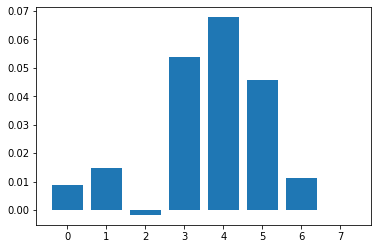

In [91]:
# get importance
from sklearn.inspection import permutation_importance
# perform permutation importance
results = permutation_importance(bgbmodel, X, y, scoring='neg_mean_squared_error')
# get importance
importance = results.importances_mean
# summarize feature importance
for i,v in enumerate(importance):
    print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

## 1.7 Performance Metrics: Check the performance of Predictions on Train and Test sets using Accuracy, Confusion Matrix, Plot ROC curve and get ROC_AUC score for each model, classification report (4 pts) Final Model - Compare and comment on all models on the basis of the performance metrics in a structured tabular manner. Describe on which model is best/optimized, After comparison which model suits the best for the problem in hand on the basis of different measures. Comment on the final model.(3 pts)


-----------------best logical regression model--------------------

AUC for the Training Data: 0.880
AUC for the Test Data: 0.900
CONFUSION MATRIX

 train 
 [[209 113]
 [ 65 680]] 

----------- 

test 
 [[ 89  51]
 [ 25 293]]
................................................................................................................... 
 

Classification Report of the training data:

               precision    recall  f1-score   support

           0       0.76      0.65      0.70       322
           1       0.86      0.91      0.88       745

    accuracy                           0.83      1067
   macro avg       0.81      0.78      0.79      1067
weighted avg       0.83      0.83      0.83      1067
 

---------------------------------------------------------- 

Classification Report of the test data:

               precision    recall  f1-score   support

           0       0.78      0.64      0.70       140
           1       0.85      0.92      0.89       318

    accurac

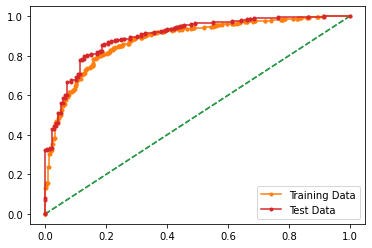

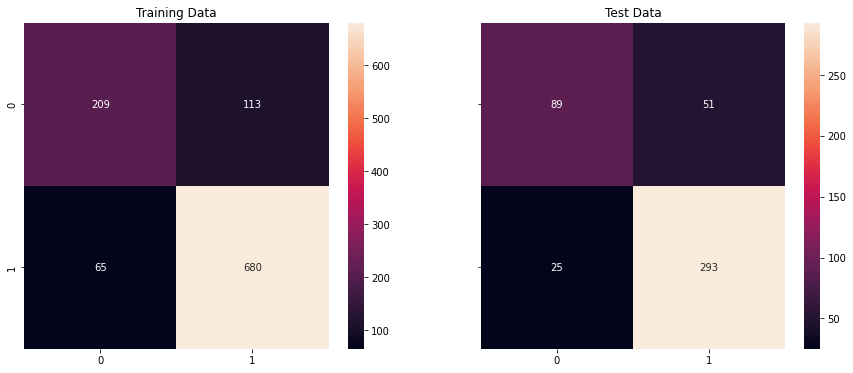

In [92]:
# AUC and ROC for the training data
print('\n-----------------best logical regression model--------------------\n')

# Predicting on Training and Test dataset
ytrain_predict = blrmodel.predict(X_train)
ytest_predict = blrmodel.predict(X_test)

# Getting the Predicted probabilities
ytrain_predict_prob=blrmodel.predict_proba(X_train)
ytest_predict_prob=blrmodel.predict_proba(X_test)

# predict probabilities
probs = blrmodel.predict_proba(X_train)

# keep probabilities for the positive outcome only
probs = probs[:, 1]

# calculate AUC
auc = metrics.roc_auc_score(y_train,probs)
print('AUC for the Training Data: %.3f' % auc)

#  calculate roc curve
fpr, tpr, thresholds = metrics.roc_curve(y_train,probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.',label = 'Training Data')

# AUC and ROC for the test data

# predict probabilities
probs = blrmodel.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
auc = metrics.roc_auc_score(y_test,probs)
print('AUC for the Test Data: %.3f' % auc)

#  calculate roc curve
fpr, tpr, thresholds = metrics.roc_curve(y_test,probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.',label='Test Data')
# show the plot
plt.legend(loc='best')

# Confusion Matrix 

print('CONFUSION MATRIX')
print('\n',"train",'\n',confusion_matrix(y_train, ytrain_predict),'\n')
print('-----------','\n')
print("test",'\n',confusion_matrix(y_test, ytest_predict))
print('...................................................................................................................','\n','\n')

f,a =  plt.subplots(1,2,sharex=True,sharey=True,squeeze=False,figsize=(15,6))


#Plotting confusion matrix for the different models for the Training Data

plot_0 = sns.heatmap((metrics.confusion_matrix(y_train,ytrain_predict)),annot=True,fmt='.5g',ax=a[0][0]);
a[0][0].set_title('Training Data')

plot_1 = sns.heatmap((metrics.confusion_matrix(y_test,ytest_predict)),annot=True,fmt='.5g',ax=a[0][1]);
a[0][1].set_title('Test Data');

# Classification report
print('Classification Report of the training data:\n\n',classification_report(y_train, ytrain_predict),'\n')
print('----------------------------------------------------------','\n')
print('Classification Report of the test data:\n\n',classification_report(y_test, ytest_predict),'\n')

print('...................................................................................................................','\n','\n')

# score of datasets
print('score for train data: ',blrmodel.score(X_train,y_train))
print('score for test data: ',blrmodel.score(X_test,y_test))


-----------------best linear discriminant analysis model--------------------

Accuracy - Training Data: 0.8359887535145267
Accuracy - Test Data: 0.834061135371179 

AUC for the Training Data: 0.882
AUC for the Test Data: 0.904
train 
 [[218 104]
 [ 71 674]] 

----------- 

test 
 [[ 92  48]
 [ 28 290]]
................................................................................................................... 
 



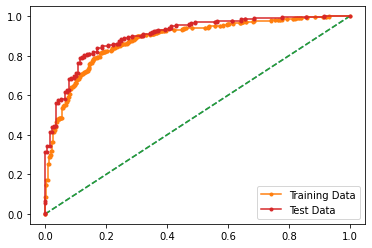

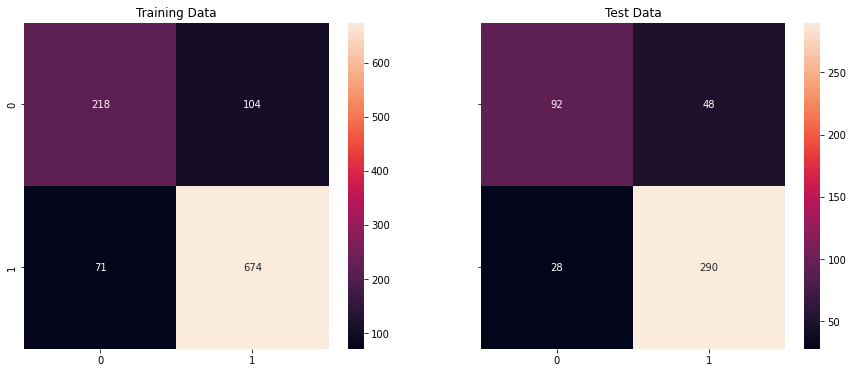

Classification Report of the training data:

               precision    recall  f1-score   support

           0       0.75      0.68      0.71       322
           1       0.87      0.90      0.89       745

    accuracy                           0.84      1067
   macro avg       0.81      0.79      0.80      1067
weighted avg       0.83      0.84      0.83      1067
 

------------------------------------------------------- 

Classification Report of the test data:

               precision    recall  f1-score   support

           0       0.77      0.66      0.71       140
           1       0.86      0.91      0.88       318

    accuracy                           0.83       458
   macro avg       0.81      0.78      0.80       458
weighted avg       0.83      0.83      0.83       458
 

score for train data:  0.8359887535145267
score for test data:  0.834061135371179


In [93]:
print('\n-----------------best linear discriminant analysis model--------------------\n')

# Training Data Class Prediction 
pred_class_ytrain = bldamodel.predict(X_train)

# Test Data Class Prediction
pred_class_test = bldamodel.predict(X_test)

# Getting the Predicted probabilities
ytrain_predict_prob=bldamodel.predict_proba(X_train)
ytest_predict_prob=bldamodel.predict_proba(X_test)

# Model evaluation

# Accuracy - Training Data
print('Accuracy - Training Data:', bldamodel.score(X_train, y_train))
# Accuracy - Test Data
print("Accuracy - Test Data:",bldamodel.score(X_test, y_test),'\n')

# AUC and ROC for the training data

# predict probabilities
probs = bldamodel.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
auc = metrics.roc_auc_score(y_train,probs)
print('AUC for the Training Data: %.3f' % auc)

#  calculate roc curve
fpr, tpr, thresholds = metrics.roc_curve(y_train,probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.',label = 'Training Data')

# AUC and ROC for the test data

# predict probabilities
probs = bldamodel.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
auc = metrics.roc_auc_score(y_test,probs)
print('AUC for the Test Data: %.3f' % auc)

#  calculate roc curve
fpr, tpr, thresholds = metrics.roc_curve(y_test,probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.',label='Test Data')
# show the plot
plt.legend(loc='best')

print("train",'\n',confusion_matrix(y_train,pred_class_ytrain ),'\n')
print('-----------','\n')
print("test",'\n',confusion_matrix(y_test, pred_class_test))

print('...................................................................................................................','\n','\n')

f,a =  plt.subplots(1,2,sharex=True,sharey=True,squeeze=False,figsize=(15,6))

#Plotting confusion matrix for the different models for the Training Data

plot_0 = sns.heatmap((metrics.confusion_matrix(y_train,pred_class_ytrain)),annot=True,fmt='.5g',ax=a[0][0]);
a[0][0].set_title('Training Data')

plot_1 = sns.heatmap((metrics.confusion_matrix(y_test,pred_class_test)),annot=True,fmt='.5g',ax=a[0][1]);
a[0][1].set_title('Test Data');
plt.show()

# Classification of reports
print('Classification Report of the training data:\n\n',metrics.classification_report(y_train,pred_class_ytrain),'\n')
print('-------------------------------------------------------','\n')
print('Classification Report of the test data:\n\n',metrics.classification_report(y_test,pred_class_test),'\n')

# score of the dataset
print('score for train data: ',bldamodel.score(X_train,y_train))
print('score for test data: ',bldamodel.score(X_test,y_test))


-----------------best KNN model--------------------

score for train data:  0.8537956888472352
score for test data:  0.8493449781659389
train
              precision    recall  f1-score   support

           0       0.83      0.78      0.80       322
           1       0.91      0.93      0.92       745

    accuracy                           0.89      1067
   macro avg       0.87      0.85      0.86      1067
weighted avg       0.88      0.89      0.88      1067

test
              precision    recall  f1-score   support

           0       0.80      0.68      0.73       140
           1       0.87      0.92      0.89       318

    accuracy                           0.85       458
   macro avg       0.83      0.80      0.81       458
weighted avg       0.85      0.85      0.85       458

AUC for the Training Data: 0.909
AUC for the Test Data: 0.894


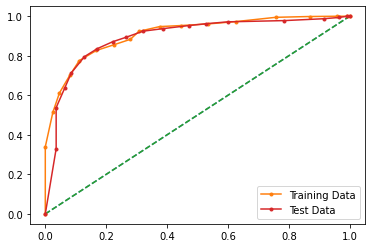

train 
 [[223  99]
 [ 57 688]] 

----------- 

test 
 [[ 95  45]
 [ 24 294]]
................................................................................................................... 
 



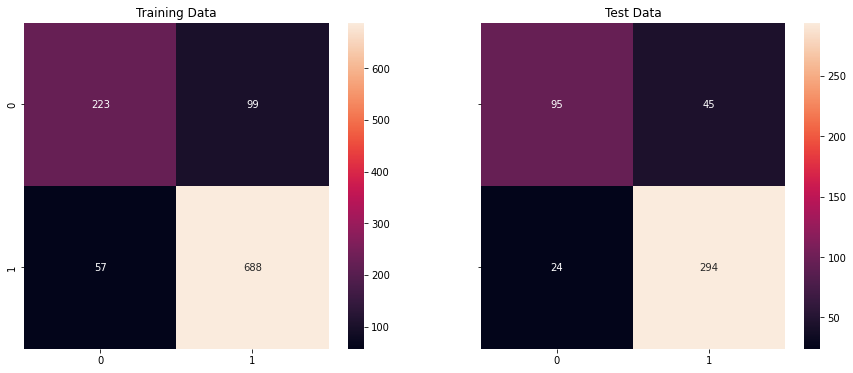

In [94]:
print('\n-----------------best KNN model--------------------\n')

predicted_labels = knnmodel.predict(X_test)
# Training Data Class Prediction 
pred_clt = knnmodel.predict(X_train)
pred_cltt = knnmodel.predict(X_test)

# Getting the Predicted probabilities
ytrain_pre=knnmodel.predict_proba(X_train)
ytest_pre=knnmodel.predict_proba(X_test)

model_score = NNH.score(X_train, y_train) 
print('score for train data: ',knnmodel.score(X_train, y_train))
print('score for test data: ',knnmodel.score(X_test, y_test))
print('train')          
print(metrics.classification_report(y_train, y_train_predict))     
print('test')

## Performance Matrix on test data set
y_test_predict = knnmodel.predict(X_test)
model_score = knnmodel.score(X_test, y_test)                          
print(metrics.classification_report(y_test, y_test_predict))    

# AUC and ROC for the training data

# predict probabilities
probs = knnmodel.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
auc = metrics.roc_auc_score(y_train,probs)
print('AUC for the Training Data: %.3f' % auc)

#  calculate roc curve
fpr, tpr, thresholds = metrics.roc_curve(y_train,probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.',label = 'Training Data')

# AUC and ROC for the test data

# predict probabilities
probs = knnmodel.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
auc = metrics.roc_auc_score(y_test,probs)
print('AUC for the Test Data: %.3f' % auc)

#  calculate roc curve
fpr, tpr, thresholds = metrics.roc_curve(y_test,probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.',label='Test Data')
# show the plot
plt.legend(loc='best')
plt.show()

print("train",'\n',confusion_matrix(y_train,pred_clt ),'\n')
print('-----------','\n')
print("test",'\n',confusion_matrix(y_test, pred_cltt))

print('...................................................................................................................','\n','\n')

f,a =  plt.subplots(1,2,sharex=True,sharey=True,squeeze=False,figsize=(15,6))

#Plotting confusion matrix for the different models for the Training Data

plot_0 = sns.heatmap((metrics.confusion_matrix(y_train,pred_clt)),annot=True,fmt='.5g',ax=a[0][0]);
a[0][0].set_title('Training Data')

plot_1 = sns.heatmap((metrics.confusion_matrix(y_test,pred_cltt)),annot=True,fmt='.5g',ax=a[0][1]);
a[0][1].set_title('Test Data');


-----------------best Naive Bayes model--------------------

AUC for the Training Data: 0.878
train
0.8256794751640113
[[227  95]
 [ 91 654]]
              precision    recall  f1-score   support

           0       0.71      0.70      0.71       322
           1       0.87      0.88      0.88       745

    accuracy                           0.83      1067
   macro avg       0.79      0.79      0.79      1067
weighted avg       0.83      0.83      0.83      1067

test
0.8427947598253275
[[ 96  44]
 [ 28 290]]
              precision    recall  f1-score   support

           0       0.77      0.69      0.73       140
           1       0.87      0.91      0.89       318

    accuracy                           0.84       458
   macro avg       0.82      0.80      0.81       458
weighted avg       0.84      0.84      0.84       458

score for train data:  0.8256794751640113
score for test data:  0.8427947598253275
AUC for the Test Data: 0.895
train 
 [[223  99]
 [ 57 688]] 

-----------

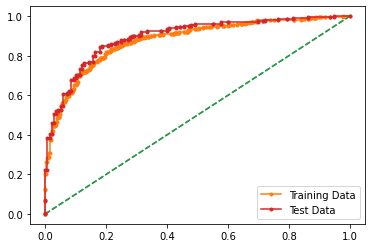

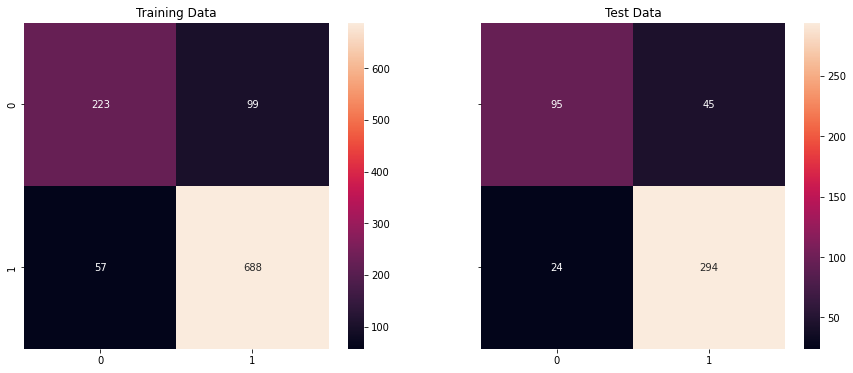

In [95]:
print('\n-----------------best Naive Bayes model--------------------\n')

# AUC and ROC for the training data

# predict probabilities
probs = bnbmodel.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
auc = metrics.roc_auc_score(y_train,probs)
print('AUC for the Training Data: %.3f' % auc)

#  calculate roc curve
fpr, tpr, thresholds = metrics.roc_curve(y_train,probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.',label = 'Training Data')

y_train_predict = bnbmodel.predict(X_train)
model_score = bnbmodel.score(X_train, y_train)                      ## Accuracy
print('train')
print(model_score)
print(metrics.confusion_matrix(y_train, y_train_predict))          ## confusion_matrix
print(metrics.classification_report(y_train, y_train_predict))     ## classification_report
print('test')
## Performance Matrix on test data set
y_test_predict = bnbmodel.predict(X_test)
model_score = bnbmodel.score(X_test, y_test)                    ## Accuracy
print(model_score)
print(metrics.confusion_matrix(y_test, y_test_predict))         ## confusion_matrix
print(metrics.classification_report(y_test, y_test_predict))    ## classification_report
print('score for train data: ',bnbmodel.score(X_train, y_train))
print('score for test data: ',bnbmodel.score(X_test, y_test))

# AUC and ROC for the test data

# predict probabilities
probs = bnbmodel.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
auc = metrics.roc_auc_score(y_test,probs)
print('AUC for the Test Data: %.3f' % auc)

#  calculate roc curve
fpr, tpr, thresholds = metrics.roc_curve(y_test,probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.',label='Test Data')
# show the plot
plt.legend(loc='best')
print("train",'\n',confusion_matrix(y_train,pred_clt ),'\n')
print('-----------','\n')
print("test",'\n',confusion_matrix(y_test, pred_cltt))

print('...................................................................................................................','\n','\n')

f,a =  plt.subplots(1,2,sharex=True,sharey=True,squeeze=False,figsize=(15,6))

#Plotting confusion matrix for the different models for the Training Data

plot_0 = sns.heatmap((metrics.confusion_matrix(y_train,pred_clt)),annot=True,fmt='.5g',ax=a[0][0]);
a[0][0].set_title('Training Data')

plot_1 = sns.heatmap((metrics.confusion_matrix(y_test,pred_cltt)),annot=True,fmt='.5g',ax=a[0][1]);
a[0][1].set_title('Test Data');
plt.show()


-----------------best Bagging model model--------------------

AUC for the Training Data: 0.925
AUC for the Test Data: 0.897
CONFUSION MATRIX

 train 
 [[189 133]
 [ 34 711]] 

----------- 

test 
 [[ 70  70]
 [ 14 304]]
................................................................................................................... 
 

Classification Report of the training data:

               precision    recall  f1-score   support

           0       0.85      0.59      0.69       322
           1       0.84      0.95      0.89       745

    accuracy                           0.84      1067
   macro avg       0.84      0.77      0.79      1067
weighted avg       0.84      0.84      0.83      1067
 

---------------------------------------------------------- 

Classification Report of the test data:

               precision    recall  f1-score   support

           0       0.83      0.50      0.62       140
           1       0.81      0.96      0.88       318

    accuracy    

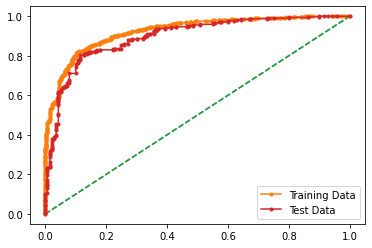

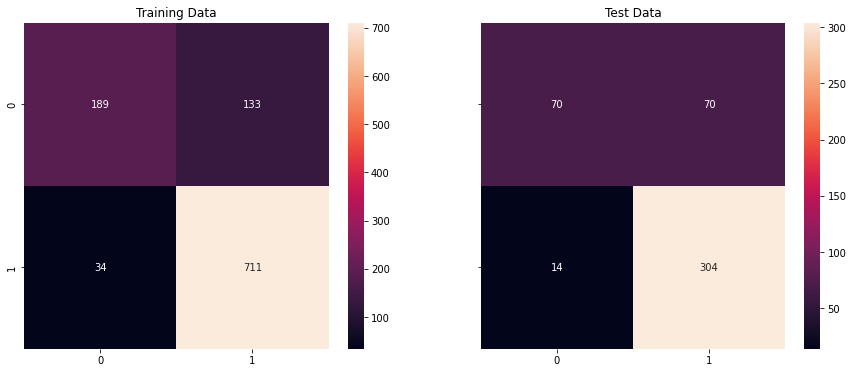

In [96]:
# AUC and ROC for the training data
print('\n-----------------best Bagging model model--------------------\n')

# Predicting on Training and Test dataset
ytrain_predict = clfb.predict(X_train)
ytest_predict = clfb.predict(X_test)

# Getting the Predicted probabilities
ytrain_predict_prob=clfb.predict_proba(X_train)
ytest_predict_prob=clfb.predict_proba(X_test)

# predict probabilities
probs = clfb.predict_proba(X_train)

# keep probabilities for the positive outcome only
probs = probs[:, 1]

# calculate AUC
auc = metrics.roc_auc_score(y_train,probs)
print('AUC for the Training Data: %.3f' % auc)

#  calculate roc curve
fpr, tpr, thresholds = metrics.roc_curve(y_train,probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.',label = 'Training Data')

# AUC and ROC for the test data

# predict probabilities
probs = clfb.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
auc = metrics.roc_auc_score(y_test,probs)
print('AUC for the Test Data: %.3f' % auc)

#  calculate roc curve
fpr, tpr, thresholds = metrics.roc_curve(y_test,probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.',label='Test Data')
# show the plot
plt.legend(loc='best')

# Confusion Matrix 

print('CONFUSION MATRIX')
print('\n',"train",'\n',confusion_matrix(y_train, ytrain_predict),'\n')
print('-----------','\n')
print("test",'\n',confusion_matrix(y_test, ytest_predict))
print('...................................................................................................................','\n','\n')

f,a =  plt.subplots(1,2,sharex=True,sharey=True,squeeze=False,figsize=(15,6))


#Plotting confusion matrix for the different models for the Training Data

plot_0 = sns.heatmap((metrics.confusion_matrix(y_train,ytrain_predict)),annot=True,fmt='.5g',ax=a[0][0]);
a[0][0].set_title('Training Data')

plot_1 = sns.heatmap((metrics.confusion_matrix(y_test,ytest_predict)),annot=True,fmt='.5g',ax=a[0][1]);
a[0][1].set_title('Test Data');

# Classification report
print('Classification Report of the training data:\n\n',classification_report(y_train, ytrain_predict),'\n')
print('----------------------------------------------------------','\n')
print('Classification Report of the test data:\n\n',classification_report(y_test, ytest_predict),'\n')

print('...................................................................................................................','\n','\n')

# score of datasets
print('score for train data: ',clfb.score(X_train,y_train))
print('score for test data: ',clfb.score(X_test,y_test))


-----------------best ADA boosting model--------------------

AUC for the Training Data: 0.895
AUC for the Test Data: 0.907
CONFUSION MATRIX

 train 
 [[213 109]
 [ 74 671]] 

----------- 

test 
 [[ 95  45]
 [ 23 295]]
................................................................................................................... 
 

Classification Report of the training data:

               precision    recall  f1-score   support

           0       0.74      0.66      0.70       322
           1       0.86      0.90      0.88       745

    accuracy                           0.83      1067
   macro avg       0.80      0.78      0.79      1067
weighted avg       0.82      0.83      0.83      1067
 

---------------------------------------------------------- 

Classification Report of the test data:

               precision    recall  f1-score   support

           0       0.81      0.68      0.74       140
           1       0.87      0.93      0.90       318

    accuracy     

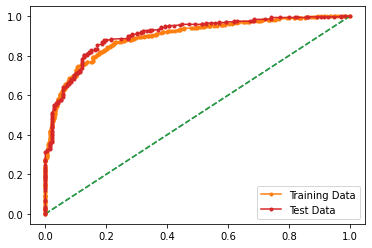

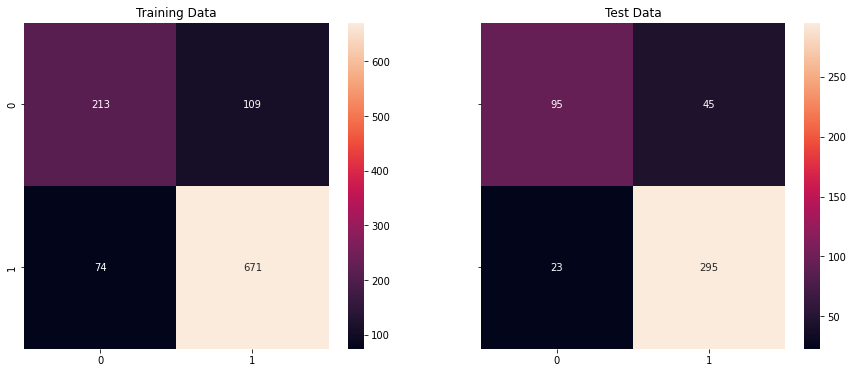

In [97]:
# AUC and ROC for the training data
print('\n-----------------best ADA boosting model--------------------\n')

# Predicting on Training and Test dataset
ytrain_predict = adbmodel.predict(X_train)
ytest_predict =adbmodel.predict(X_test)

# Getting the Predicted probabilities
ytrain_predict_prob=adbmodel.predict_proba(X_train)
ytest_predict_prob=adbmodel.predict_proba(X_test)

# predict probabilities
probs = adbmodel.predict_proba(X_train)

# keep probabilities for the positive outcome only
probs = probs[:, 1]

# calculate AUC
auc = metrics.roc_auc_score(y_train,probs)
print('AUC for the Training Data: %.3f' % auc)

#  calculate roc curve
fpr, tpr, thresholds = metrics.roc_curve(y_train,probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.',label = 'Training Data')

# AUC and ROC for the test data

# predict probabilities
probs = adbmodel.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
auc = metrics.roc_auc_score(y_test,probs)
print('AUC for the Test Data: %.3f' % auc)

#  calculate roc curve
fpr, tpr, thresholds = metrics.roc_curve(y_test,probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.',label='Test Data')
# show the plot
plt.legend(loc='best')

# Confusion Matrix 

print('CONFUSION MATRIX')
print('\n',"train",'\n',confusion_matrix(y_train, ytrain_predict),'\n')
print('-----------','\n')
print("test",'\n',confusion_matrix(y_test, ytest_predict))
print('...................................................................................................................','\n','\n')

f,a =  plt.subplots(1,2,sharex=True,sharey=True,squeeze=False,figsize=(15,6))


#Plotting confusion matrix for the different models for the Training Data

plot_0 = sns.heatmap((metrics.confusion_matrix(y_train,ytrain_predict)),annot=True,fmt='.5g',ax=a[0][0]);
a[0][0].set_title('Training Data')

plot_1 = sns.heatmap((metrics.confusion_matrix(y_test,ytest_predict)),annot=True,fmt='.5g',ax=a[0][1]);
a[0][1].set_title('Test Data');

# Classification report
print('Classification Report of the training data:\n\n',classification_report(y_train, ytrain_predict),'\n')
print('----------------------------------------------------------','\n')
print('Classification Report of the test data:\n\n',classification_report(y_test, ytest_predict),'\n')

print('...................................................................................................................','\n','\n')

# score of datasets
print('score for train data: ',adbmodel.score(X_train,y_train))
print('score for test data: ',adbmodel.score(X_test,y_test))


-----------------best Gradient boosting model--------------------

AUC for the Training Data: 0.895
AUC for the Test Data: 0.907
CONFUSION MATRIX

 train 
 [[213 109]
 [ 74 671]] 

----------- 

test 
 [[ 95  45]
 [ 23 295]]
................................................................................................................... 
 

Classification Report of the training data:

               precision    recall  f1-score   support

           0       0.74      0.66      0.70       322
           1       0.86      0.90      0.88       745

    accuracy                           0.83      1067
   macro avg       0.80      0.78      0.79      1067
weighted avg       0.82      0.83      0.83      1067
 

---------------------------------------------------------- 

Classification Report of the test data:

               precision    recall  f1-score   support

           0       0.81      0.68      0.74       140
           1       0.87      0.93      0.90       318

    accuracy

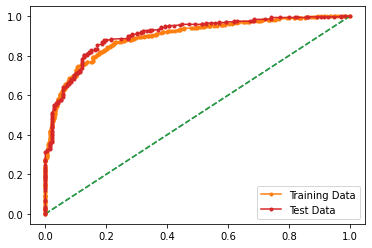

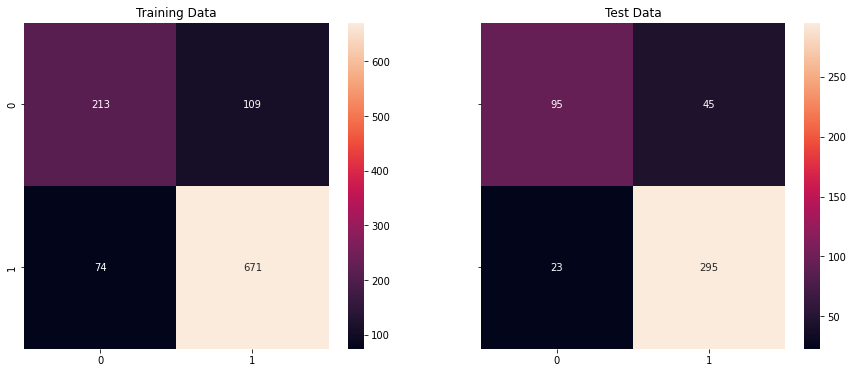

In [114]:
# AUC and ROC for the training data
print('\n-----------------best Gradient boosting model--------------------\n')
adbmodel=bgbmodel
# Predicting on Training and Test dataset
ytrain_predict = adbmodel.predict(X_train)
ytest_predict =adbmodel.predict(X_test)

# Getting the Predicted probabilities
ytrain_predict_prob=adbmodel.predict_proba(X_train)
ytest_predict_prob=adbmodel.predict_proba(X_test)

# predict probabilities
probs = adbmodel.predict_proba(X_train)

# keep probabilities for the positive outcome only
probs = probs[:, 1]

# calculate AUC
auc = metrics.roc_auc_score(y_train,probs)
print('AUC for the Training Data: %.3f' % auc)

#  calculate roc curve
fpr, tpr, thresholds = metrics.roc_curve(y_train,probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.',label = 'Training Data')

# AUC and ROC for the test data

# predict probabilities
probs = adbmodel.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
auc = metrics.roc_auc_score(y_test,probs)
print('AUC for the Test Data: %.3f' % auc)

#  calculate roc curve
fpr, tpr, thresholds = metrics.roc_curve(y_test,probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.',label='Test Data')
# show the plot
plt.legend(loc='best')

# Confusion Matrix 

print('CONFUSION MATRIX')
print('\n',"train",'\n',confusion_matrix(y_train, ytrain_predict),'\n')
print('-----------','\n')
print("test",'\n',confusion_matrix(y_test, ytest_predict))
print('...................................................................................................................','\n','\n')

f,a =  plt.subplots(1,2,sharex=True,sharey=True,squeeze=False,figsize=(15,6))


#Plotting confusion matrix for the different models for the Training Data

plot_0 = sns.heatmap((metrics.confusion_matrix(y_train,ytrain_predict)),annot=True,fmt='.5g',ax=a[0][0]);
a[0][0].set_title('Training Data')

plot_1 = sns.heatmap((metrics.confusion_matrix(y_test,ytest_predict)),annot=True,fmt='.5g',ax=a[0][1]);
a[0][1].set_title('Test Data');

# Classification report
print('Classification Report of the training data:\n\n',classification_report(y_train, ytrain_predict),'\n')
print('----------------------------------------------------------','\n')
print('Classification Report of the test data:\n\n',classification_report(y_test, ytest_predict),'\n')

print('...................................................................................................................','\n','\n')

# score of datasets
print('score for train data: ',adbmodel.score(X_train,y_train))
print('score for test data: ',adbmodel.score(X_test,y_test))

## 1.8) Based on your analysis and working on the business problem, detail out appropriate insights and recommendations to help the management solve the business objective. There should be at least 3-4 Recommendations and insights in total. Recommendations should be easily understandable and business specific, students should not give any technical suggestions. Full marks should only be allotted if the recommendations are correct and business specific.

In [ ]:
# in the business file

# PROBLEM 2

In this particular project, we are going to work on the inaugural corpora from the nltk in Python. We will be looking at the following speeches of the Presidents of the United States of America:


President Franklin D. Roosevelt in 1941

President John F. Kennedy in 1961

President Richard Nixon in 1973

In [127]:
import random
import string # this is used for string manipulations
import nltk
nltk.download('inaugural')
from nltk.corpus import stopwords 
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import inaugural
inaugural.fileids()
inaugural.raw('1941-Roosevelt.txt')
inaugural.raw('1961-Kennedy.txt')
inaugural.raw('1973-Nixon.txt')

[nltk_data] Downloading package inaugural to
[nltk_data]     C:\Users\Dubey\AppData\Roaming\nltk_data...
[nltk_data]   Package inaugural is already up-to-date!


'Mr. Vice President, Mr. Speaker, Mr. Chief Justice, Senator Cook, Mrs. Eisenhower, and my fellow citizens of this great and good country we share together:\n\nWhen we met here four years ago, America was bleak in spirit, depressed by the prospect of seemingly endless war abroad and of destructive conflict at home.\n\nAs we meet here today, we stand on the threshold of a new era of peace in the world.\n\nThe central question before us is: How shall we use that peace? Let us resolve that this era we are about to enter will not be what other postwar periods have so often been: a time of retreat and isolation that leads to stagnation at home and invites new danger abroad.\n\nLet us resolve that this will be what it can become: a time of great responsibilities greatly borne, in which we renew the spirit and the promise of America as we enter our third century as a nation.\n\nThis past year saw far-reaching results from our new policies for peace. By continuing to revitalize our traditional

In [128]:
# lets print number of speeches present in the dataset
speech=inaugural.fileids()
print('data has ',len(speech),' number of speeches')
# as per problem we have to analyse speeches of roosevelt , kenney and nixon 
roosevelt = speech[38]
kenney = speech[43]
nixon = speech[46]

data has  59  number of speeches


In [129]:
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Dubey\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Dubey\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

### 2.1) Find the number of characters, words and sentences for the mentioned documents. (Hint: use .words(), .raw(), .sent() for extracting counts)

In [130]:
print('1941-Roosevelt.txt')
print("The number of sentences =", len(inaugural.sents('1941-Roosevelt.txt')))
print("The number of paragraphs =", len(inaugural.paras('1941-Roosevelt.txt')))
print("The number of words =", len(inaugural.words('1941-Roosevelt.txt')))
print("The number of characters =", len([char for sentence in inaugural.sents('1941-Roosevelt.txt') for word in sentence for char in word]))
print('-------------------------------------')
print('1961-Kennedy.txt')
print("The number of sentences =", len(inaugural.sents('1961-Kennedy.txt')))
print("The number of paragraphs =", len(inaugural.paras('1961-Kennedy.txt')))
print("The number of words =", len(inaugural.words('1961-Kennedy.txt')))
print("The number of characters =", len([char for sentence in inaugural.sents('1961-Kennedy.txt') for word in sentence for char in word]))
print('-------------------------------------')
print('1973-Nixon.txt')
print("The number of sentences =", len(inaugural.sents('1973-Nixon.txt')))
print("The number of paragraphs =", len(inaugural.paras('1973-Nixon.txt')))
print("The number of words =", len(inaugural.words('1973-Nixon.txt')))
print("The number of characters =", len([char for sentence in inaugural.sents('1973-Nixon.txt') for word in sentence for char in word]))

1941-Roosevelt.txt
The number of sentences = 68
The number of paragraphs = 38
The number of words = 1536
The number of characters = 6174
-------------------------------------
1961-Kennedy.txt
The number of sentences = 52
The number of paragraphs = 27
The number of words = 1546
The number of characters = 6202
-------------------------------------
1973-Nixon.txt
The number of sentences = 69
The number of paragraphs = 51
The number of words = 2028
The number of characters = 8122


In [102]:
print('1941-Roosevelt.txt')
print(len(inaugural.raw('1941-Roosevelt.txt')))
print('-------------------------------------')
print('1961-Kennedy.txt')
print(len(inaugural.raw('1961-Kennedy.txt')))
print('-------------------------------------')
print('1973-Nixon.txt')
print(len(inaugural.raw('1973-Nixon.txt')))

1941-Roosevelt.txt
7571
-------------------------------------
1961-Kennedy.txt
7618
-------------------------------------
1973-Nixon.txt
9991


In [132]:
print('1941-Roosevelt.txt')
print(nltk.FreqDist(inaugural.words('1941-Roosevelt.txt')).most_common(3))
print('1961-Kennedy.txt')
print(nltk.FreqDist(inaugural.words('1961-Kennedy.txt')).most_common(3))
print('1973-Nixon.txt')
print(nltk.FreqDist(inaugural.words('1973-Nixon.txt')).most_common(3))

1941-Roosevelt.txt
[('the', 104), ('of', 81), (',', 77)]
1961-Kennedy.txt
[(',', 85), ('the', 83), ('of', 65)]
1973-Nixon.txt
[(',', 96), ('the', 80), ('.', 68)]


### 2.2) Remove all the stopwords from the three speeches. Show the word count before and after the removal of stopwords. Show a sample sentence after the removal of stopwords.

In [104]:
list(string.punctuation)[:5]
bbb=['--']
stop=nltk.corpus.stopwords.words('english')+list(string.punctuation)+bbb

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're"]

In [105]:
rwords=inaugural.words('1941-Roosevelt.txt')
kwords=inaugural.words('1961-Kennedy.txt')
nwords=inaugural.words('1973-Nixon.txt')

In [106]:
# Converting all the words to lower case
rwordsl = (word.lower() for word in rwords)
kwordsl = (word.lower() for word in kwords)
nwordsl = (word.lower() for word in nwords)

In [107]:
rwords_clean = [word for word in rwordsl if word not in stop]
kwords_clean = [word for word in kwordsl if word not in stop]
nwords_clean = [word for word in nwordsl if word not in stop]

In [108]:
print('\n1941-Roosevelt')
print("number Words befour removing the stop words==>",len(rwords))
print("number Words after removing the stop words ==>",len(rwords_clean))

print('-------------------------------------------------------------------------------------------------------------------')
print('\n1961=Kenny')

print("Words befour removing the stop words==>",len(kwords))
print("Words after removing the stop words ==>",len(kwords_clean))

print('-------------------------------------------------------------------------------------------------------------------')
print('\n1973-Nixon')

print("Words befour removing the stop words ==>",len(nwords))
print("Words after removing the stop words ==>",len(nwords_clean))


1941-Roosevelt
number Words befour removing the stop words==> 1536
number Words after removing the stop words ==> 632
-------------------------------------------------------------------------------------------------------------------

1961=Kenny
Words befour removing the stop words==> 1546
Words after removing the stop words ==> 697
-------------------------------------------------------------------------------------------------------------------

1973-Nixon
Words befour removing the stop words ==> 2028
Words after removing the stop words ==> 836


In [109]:
print('\n1941-Roosevelt')
print('\nSentence befour cleaing:')
print(" ".join(inaugural.sents('1941-Roosevelt.txt')[0]))
print('\nSentence after cleaing:')
print(" ".join(rwords_clean[:11]))
print('\n------------------------------------------------------------------------------------------------------------------------------------------------------------------------------')
print('\n1961-Kenny')
print('\nSentence befour cleaing:')
print(" ".join(inaugural.sents('1961-Kennedy.txt')[0]))
print('\nSentence after cleaing:')
print(" ".join(kwords_clean[:33]))
print('\n-----------------------------------------------------------------------------------------------------------------------------------------------------------------------------')
print('\n1973-Nixon')
print('\nSentence befour cleaing:')
print(" ".join(inaugural.sents('1973-Nixon.txt')[0]))
print('\nSentence after cleaing:')
print(" ".join(nwords_clean[:19]))



1941-Roosevelt

Sentence befour cleaing:
On each national day of inauguration since 1789 , the people have renewed their sense of dedication to the United States .

Sentence after cleaing:
national day inauguration since 1789 people renewed sense dedication united states

------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

1961-Kenny

Sentence befour cleaing:
Vice President Johnson , Mr . Speaker , Mr . Chief Justice , President Eisenhower , Vice President Nixon , President Truman , reverend clergy , fellow citizens , we observe today not a victory of party , but a celebration of freedom -- symbolizing an end , as well as a beginning -- signifying renewal , as well as change .

Sentence after cleaing:
vice president johnson mr speaker mr chief justice president eisenhower vice president nixon president truman reverend clergy fellow citizens observe today victory 

### 2.3) Which word occurs the most number of times in his inaugural address for each president? Mention the top three words. (after removing the stopwords)

In [110]:
print('Word occurs the most number of times in the speeches :')
print('BEFOUR removing the stopwords : \n')
print('1941-Roosevelt most common words')
print(nltk.FreqDist(rwords).most_common(3))
print('1961-Kennedy.txt')
print(nltk.FreqDist(kwords).most_common(3))
print('1973-Nixon.txt')
print(nltk.FreqDist(nwords).most_common(3))
print('--------------------------------------------------------')
print('AFTER removing the stopwords : \n')
print('1941-Roosevelt')
print(nltk.FreqDist(rwords_clean).most_common(3))
print('1961-Kennedy.txt')
print(nltk.FreqDist(kwords_clean).most_common(3))
print('1973-Nixon.txt')
print(print(nltk.FreqDist(nwords_clean).most_common(3)))

Word occurs the most number of times in the speeches :
BEFOUR removing the stopwords : 

1941-Roosevelt most common words
[('the', 104), ('of', 81), (',', 77)]
1961-Kennedy.txt
[(',', 85), ('the', 83), ('of', 65)]
1973-Nixon.txt
[(',', 96), ('the', 80), ('.', 68)]
--------------------------------------------------------
AFTER removing the stopwords : 

1941-Roosevelt
[('nation', 12), ('know', 10), ('spirit', 9)]
1961-Kennedy.txt
[('let', 16), ('us', 12), ('world', 8)]
1973-Nixon.txt
[('us', 26), ('let', 22), ('america', 21)]
None


### 2.4) Plot the word cloud of each of the three speeches. (after removing the stopwords)

Word Cloud for 1941 Roosevelt Speech (after cleaning)!!


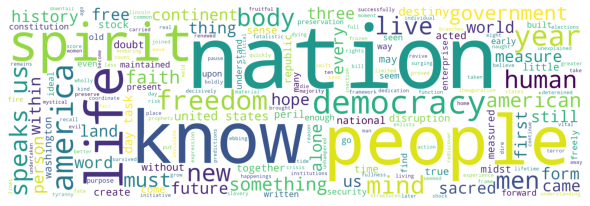

In [111]:
# Word Cloud 
rs = ' '.join(rwords_clean)
from wordcloud import WordCloud
wordcloud = WordCloud(width = 3000, height = 1000, 
                background_color ='white', 
                min_font_size = 10, random_state=100).generate(rs) 
  
# plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off")
plt.xlabel('Word Cloud')
plt.tight_layout(pad = 0) 

print("Word Cloud for 1941 Roosevelt Speech (after cleaning)!!")
plt.show()


Word Cloud for 1961 Kenny Speech (after cleaning)!!


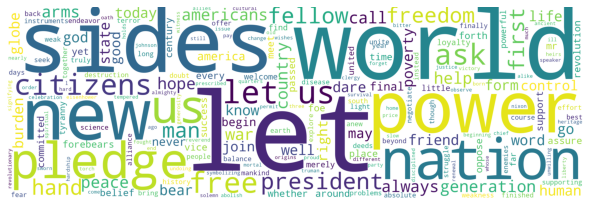

In [112]:
# Word Cloud 
ks = ' '.join(kwords_clean)
from wordcloud import WordCloud
wordcloud = WordCloud(width = 3000, height = 1000, 
                background_color ='white', 
                min_font_size = 10, random_state=100).generate(ks) 
  
# plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off")
plt.xlabel('Word Cloud')
plt.tight_layout(pad = 0) 

print("Word Cloud for 1961 Kenny Speech (after cleaning)!!")
plt.show()


Word Cloud for 1973 Nixon Speech (after cleaning)!!


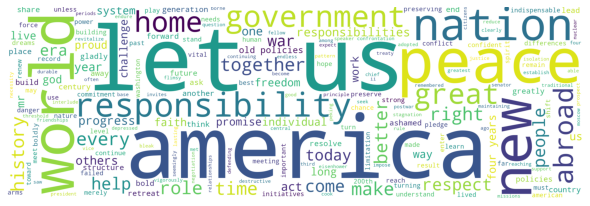

In [113]:
# Word Cloud 
ns = ' '.join(nwords_clean)
from wordcloud import WordCloud
wordcloud = WordCloud(width = 3000, height = 1000, 
                background_color ='white', 
                min_font_size = 10, random_state=100).generate(ns) 
  
# plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off")
plt.xlabel('Word Cloud')
plt.tight_layout(pad = 0) 

print("Word Cloud for 1973 Nixon Speech (after cleaning)!!")
plt.show()
